<a href="https://colab.research.google.com/github/CollinStout24/ISTA-322/blob/main/ISTA_322_Su24_Final_collin_stout.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#ISTA 322 Final Project - Collin Stout

##Purpose

The purpose of this final project is to join data sources from across the web from the National Center for Educational Statistics' (NCES) Integrated Postsecondary Education Data System (IPEDS) public data, as well as data from the State Higher Education Finance (SHEF), which is compiled by the State Higher Education Executive Officers Association (SHEEO).

##What questions can this RDB answer?


*   Does a states' capacity to fund higher education have a statistically significant effect on retention/graduation outcomes for students?
*   Similarly, does a states' overall student tuition share have an impact on retention/graduation outcomes?
* What are the differences between a states capacity to fund higher education and actual percentage of aid via budget allocation and does that have an impact on retention.graduation outcomes?



##Who will the end user of this RDB be?

* This RDB can be used by advocacy groups or state governments to help show the relationship between state funding and retention/graduation outcomes for students. Thus, they could potentially advocate for increased funding at higher education institutions.  

##Data Sources

[Urban Institute - IPEDS Data](https://educationdata.urban.org/documentation/colleges.html#ipeds_institutional-characteristics)
* Specific reports:
  *   IPEDS Institutional Characteristics
  *   Fall Retention
  *   Graduation Rate (200%)

[SHEEO SHEF Data](https://shef.sheeo.org/data-downloads/)
* Specific Reports:
  *   State Effort Capacity
  *   Overall Report Data

## Extract

In [ ]:
#importing useful modules
import pandas as pd
import datetime
import numpy as np
import math

### Loading Data

In [ ]:
#Loading my data
#I uploaded these as CSV's to my Google Drive and will upload them and assign them to individual variables
# /gviz/tq?tqx=out:csv

ipeds_directory = pd.read_csv('https://docs.google.com/spreadsheets/d/1mmwvsfq-rfAuMRovokU_bvXIkgnTRfhN/gviz/tq?tqx=out:csv')
ipeds_graduation = pd.read_csv('https://docs.google.com/spreadsheets/d/1NrVqIJDWj9Kt4ZHz_5Wjcj7WNOwxdclm2CkgZgFAhIU/gviz/tq?tqx=out:csv')
ipeds_retention = pd.read_csv('https://docs.google.com/spreadsheets/d/1h5HY1tEcnpPNYLVwquctkZeOumujA34I1v650smy-BM/gviz/tq?tqx=out:csv')
sheeo_report = pd.read_csv('https://docs.google.com/spreadsheets/d/17HHdoqbQ7C2D4-Y3HHxgXZ3ZcSdYzFLUJJHLBzW2eHk/gviz/tq?tqx=out:csv')
sheeo_effort = pd.read_csv('https://docs.google.com/spreadsheets/d/1Qj6m-9O-QYdfRYhraRuu7HMkRydf-N9X/gviz/tq?tqx=out:csv')

<ipython-input-2-587980b0c69a>:5: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  ipeds_directory = pd.read_csv('https://docs.google.com/spreadsheets/d/1mmwvsfq-rfAuMRovokU_bvXIkgnTRfhN/gviz/tq?tqx=out:csv')


In [ ]:
#first pass at cleaning to make the data more manageable
ipeds_directory.columns

Index(['unitid', 'year', 'opeid', 'inst_name', 'inst_alias', 'address',
       'state_abbr', 'fips', 'zip', 'phone_number', 'city', 'county_name',
       'county_fips', 'region', 'urban_centric_locale', 'cbsa', 'cbsa_type',
       'csa', 'necta', 'longitude', 'latitude', 'congress_district_id', 'ein',
       'ueis', 'chief_admin_name', 'chief_admin_title', 'inst_status',
       'currently_active_ipeds', 'degree_granting', 'open_public',
       'title_iv_indicator', 'postsec_public_active',
       'postsec_public_active_title_iv', 'date_closed', 'newid',
       'year_deleted', 'inst_control', 'institution_level', 'inst_category',
       'inst_size', 'sector', 'primarily_postsecondary', 'hbcu', 'hospital',
       'medical_degree', 'tribal_college', 'land_grant',
       'offering_highest_degree', 'offering_highest_level',
       'offering_undergrad', 'offering_grad', 'url_school', 'url_fin_aid',
       'url_application', 'url_netprice', 'url_veterans', 'url_athletes',
       'url_disabili

In [ ]:
#I'm getting rid of a lot of this information. It would make the df a lot larger than it needs to be, and for this df, we mainly need basic categorical institution information.
ipeds_direct_temp = ipeds_directory[['unitid', 'year', 'fips', 'inst_name', 'inst_alias', 'state_abbr', 'institution_level', 'inst_category',
                                    'inst_size']]

ipeds_direct_temp.head()

,unitid,year,fips,inst_name,inst_alias,state_abbr,institution_level,inst_category,inst_size
0,100654,2022,1.0,Alabama A & M University,AAMU,AL,4.0,2.0,3.0
1,100663,2022,1.0,University of Alabama at Birmingham,UAB,AL,4.0,2.0,5.0
2,100690,2022,1.0,Amridge University,Southern Christian University Regions University,AL,4.0,2.0,1.0
3,100706,2022,1.0,University of Alabama in Huntsville,UAH University of Alabama Huntsville,AL,4.0,2.0,3.0
4,100724,2022,1.0,Alabama State University,,AL,4.0,2.0,2.0


In [ ]:
#not getting rid of anything here because it can all be useful
ipeds_graduation_temp = ipeds_graduation


In [ ]:
ipeds_retention.columns

Index(['unitid', 'year', 'fips', 'ftpt', 'retention_rate',
       'returning_students', 'prev_cohort', 'prev_exclusions',
       'prev_cohort_adj'],
      dtype='object')

In [ ]:
ipeds_retention.describe()

,unitid,year,fips,ftpt,retention_rate,returning_students,prev_cohort,prev_exclusions,prev_cohort_adj
count,324778.000000,324778.000000,324778.000000,324778.000000,248995.000000,245978.000000,245978.000000,245978.000000,245978.000000
mean,271086.002673,2012.049551,29.428222,29.090046,0.640937,226.155242,331.991690,1.161657,330.843043
std,128916.381894,4.830759,16.638530,43.920429,0.227284,586.331271,771.439537,25.150501,768.900240
min,100654.000000,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166595.000000,2008.000000,13.000000,1.000000,0.500000,5.000000,9.000000,0.000000,9.000000
50%,216524.000000,2012.000000,29.000000,2.000000,0.670000,33.000000,53.000000,0.000000,53.000000
75%,427894.000000,2016.000000,42.000000,99.000000,0.810000,180.000000,297.000000,0.000000,297.000000
max,496423.000000,2020.000000,78.000000,99.000000,1.000000,13600.000000,19327.000000,3236.000000,19308.000000


In [ ]:
#not getting rid of anything here because it is all useful
ipeds_retention_temp = ipeds_retention

ipeds_retention_temp.head()

,unitid,year,fips,ftpt,retention_rate,returning_students,prev_cohort,prev_exclusions,prev_cohort_adj
0,100654,2003,1,1,0.75,NaN,NaN,NaN,NaN
1,100654,2003,1,2,0.57,NaN,NaN,NaN,NaN
2,100663,2003,1,1,0.75,NaN,NaN,NaN,NaN
3,100663,2003,1,2,0.54,NaN,NaN,NaN,NaN
4,100690,2003,1,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
sheeo_report.columns

Index(['State', 'FY', 'COLI (Cost of Living) Adjustment',
       'EMI (Enrollment Mix) Adjustment', 'HECA (Inflation) Adjustment',
       'CPI (Inflation) Adjustment', 'Total State Support',
       'Total State and Local Support', 'Total Federal Stimulus',
       'Total State and Local Support Excluding Federal Stimulus',
       'Adjustments to State Support',
       'Research - Agriculture - Medical (RAM)', 'Total Independent Support',
       'Total Financial Aid', 'Education Appropriations',
       'Public Federal Stimulus',
       'Education Appropriations Excluding Federal Stimulus',
       'General Public Operations',
       'State Public Financial Aid as a Percent of Education Appropriations',
       'Net Tuition and Fee Revenue', 'Student Share',
       'Total Education Revenue',
       'Total Education Revenue Excluding Federal Stimulus',
       'Net FTE Enrollment', 'State Tax Appropriations', 'Non-Tax Support',
       'Local Appropriations', 'Federal Stimulus Used for Financi

In [ ]:
#removing everything related to med school/research. keeping the rest because it could technically be used in the future even though we will not use it in our tables.
sheeo_report_temp = sheeo_report[['State', 'FY', 'COLI (Cost of Living) Adjustment',
       'EMI (Enrollment Mix) Adjustment', 'HECA (Inflation) Adjustment',
       'CPI (Inflation) Adjustment', 'Total State Support',
       'Total State and Local Support', 'Total Federal Stimulus',
       'Total State and Local Support Excluding Federal Stimulus',
       'Adjustments to State Support',
       'Research - Agriculture - Medical (RAM)', 'Total Independent Support',
       'Total Financial Aid', 'Education Appropriations',
       'Public Federal Stimulus',
       'Education Appropriations Excluding Federal Stimulus',
       'General Public Operations',
       'State Public Financial Aid as a Percent of Education Appropriations',
       'Net Tuition and Fee Revenue', 'Student Share',
       'Total Education Revenue',
       'Total Education Revenue Excluding Federal Stimulus',
       'Net FTE Enrollment', 'State Tax Appropriations', 'Non-Tax Support',
       'Local Appropriations', 'Federal Stimulus Used for Financial Aid',
       'Agency Funding', 'Independent Operating', 'Non-Credit',
       'State Public Financial Aid', 'Independent Financial Aid',
       'Out-of-State Financial Aid', 'Institutional Discounts and Waivers',
       'Tuition and Fees Used for Debt Service', 'Gross FTE Enrollment']]

sheeo_report_temp.head()

,State,FY,COLI (Cost of Living) Adjustment,EMI (Enrollment Mix) Adjustment,HECA (Inflation) Adjustment,CPI (Inflation) Adjustment,Total State Support,Total State and Local Support,Total Federal Stimulus,Total State and Local Support Excluding Federal Stimulus,...,Federal Stimulus Used for Financial Aid,Agency Funding,Independent Operating,Non-Credit,State Public Financial Aid,Independent Financial Aid,Out-of-State Financial Aid,Institutional Discounts and Waivers,Tuition and Fees Used for Debt Service,Gross FTE Enrollment
0,Alabama,2023,0.874817,1.020407,1.0,1.0,"$3,051,174,272","$3,053,449,272",NaN,"$3,053,449,272",...,$-,"$18,599,544","$58,403,909","$13,814,656","$52,193,432","$10,899,304",$-,NaN,"$161,887,651","208,913"
1,Alaska,2023,1.240049,0.972260,1.0,1.0,"$319,785,930","$320,672,930",NaN,"$320,672,930",...,$-,NaN,$-,$-,"$11,773,886","$1,775,336","$3,339,800","$16,640,838",$-,"12,075"
2,Arizona,2023,0.962463,1.016214,1.0,1.0,"$1,397,700,100","$2,390,726,700",NaN,"$2,390,726,700",...,$-,"$2,496,500",$-,$-,"$56,128,900","$183,100","$4,078,000","$1,245,072,600","$135,091,700","305,911"
3,Arkansas,2023,0.852109,1.004731,1.0,1.0,"$1,080,876,566","$1,119,683,135",NaN,"$1,119,683,135",...,$-,"$3,645,808",$-,$-,"$95,854,500","$12,859,860","$6,139,142","$163,283,429","$93,031,189","106,833"
4,California,2023,1.271378,0.974561,1.0,1.0,"$20,472,263,422","$24,258,776,422",NaN,"$24,258,776,422",...,$-,"$21,241,000",$-,$-,"$2,010,622,365","$217,632,885",$-,"$2,029,716,000",$-,"1,565,065"


In [ ]:
sheeo_effort.columns

Index(['State', 'FY', 'COLI (Cost of Living) Adjustment',
       'EMI (Enrollment Mix) Adjustment', '2022 HECA (Inflation) Adjustment',
       '2021 HECA (Inflation) Adjustment', '2022 CPI (Inflation) Adjustment',
       '2021 CPI (Inflation) Adjustment', ' Actual Tax Revenue (ATR) ',
       ' Total Taxable Resources (TTR) ', ' Personal Income (Thousands) ',
       'Population', ' Lottery Profits ', 'Effective Tax Rate (Calculated)',
       ' Total State and Local Support Excluding Federal Stimulus (Calculated) ',
       ' Support Per Capita (Calculated) ',
       'Allocation to Higher Education (Calculated)',
       ' Support Per $1,000 in Personal Income (Calculated) ', 'Unnamed: 18'],
      dtype='object')

In [ ]:
#keeping it all because it could technically be used in the future even though we will not use it in our tables.
sheeo_effort_temp = sheeo_effort

sheeo_effort_temp.head()

,State,FY,COLI (Cost of Living) Adjustment,EMI (Enrollment Mix) Adjustment,2022 HECA (Inflation) Adjustment,2021 HECA (Inflation) Adjustment,2022 CPI (Inflation) Adjustment,2021 CPI (Inflation) Adjustment,Actual Tax Revenue (ATR),Total Taxable Resources (TTR),Personal Income (Thousands),Population,Lottery Profits,Effective Tax Rate (Calculated),Total State and Local Support Excluding Federal Stimulus (Calculated),Support Per Capita (Calculated),Allocation to Higher Education (Calculated),"Support Per $1,000 in Personal Income (Calculated)",Unnamed: 18
0,Alabama,2022,0.874817,1.020407,1.0,NaN,1.0,NaN,NaN,NaN,"$ 245,905,593,750","5,050,380",NaN,NaN,"$ 1,989,124,302",$ 394,NaN,$ 8.09,NaN
1,Alaska,2022,1.240049,0.972260,1.0,NaN,1.0,NaN,NaN,NaN,"$ 47,397,601,563","734,923",NaN,NaN,"$ 299,299,932",$ 407,NaN,$ 6.31,NaN
2,Arizona,2022,0.962463,1.016214,1.0,NaN,1.0,NaN,NaN,NaN,"$ 399,771,593,750","7,272,487",NaN,NaN,"$ 2,133,249,000",$ 293,NaN,$ 5.34,NaN
3,Arkansas,2022,0.852109,1.004731,1.0,NaN,1.0,NaN,NaN,NaN,"$ 153,027,906,250","3,028,443",NaN,NaN,"$ 1,119,859,506",$ 370,NaN,$ 7.32,NaN
4,California,2022,1.271378,0.974561,1.0,NaN,1.0,NaN,NaN,NaN,"$ 2,972,063,000,000","39,145,060",NaN,NaN,"$ 22,683,140,454",$ 579,NaN,$ 7.63,NaN


##Transform

In [ ]:
#first I am going to make sure the data all covers the same time range.
#Several of the data goes back to the 80's, while some starts in the 2000's.
#We also want to make sure the data concludes in the same year.

In [ ]:
ipeds_direct_temp.describe()

,unitid,year,fips,institution_level,inst_category,inst_size
count,65535.000000,65535.000000,65532.000000,62844.000000,28063.000000,27056.000000
mean,149640.661982,2002.396979,11.468168,2.389027,3.461996,1.800525
std,91633.162564,13.171740,12.142173,1.325146,1.937657,1.366744
min,14.000000,1980.000000,1.000000,-1.000000,-2.000000,-2.000000
25%,111009.000000,1990.000000,6.000000,1.000000,2.000000,1.000000
50%,122737.000000,2000.000000,6.000000,2.000000,4.000000,1.000000
75%,134608.000000,2016.000000,12.000000,4.000000,6.000000,2.000000
max,498571.000000,2022.000000,78.000000,4.000000,6.000000,5.000000


In [ ]:
ipeds_retention_temp.describe()

,unitid,year,fips,ftpt,retention_rate,returning_students,prev_cohort,prev_exclusions,prev_cohort_adj
count,324778.000000,324778.000000,324778.000000,324778.000000,248995.000000,245978.000000,245978.000000,245978.000000,245978.000000
mean,271086.002673,2012.049551,29.428222,29.090046,0.640937,226.155242,331.991690,1.161657,330.843043
std,128916.381894,4.830759,16.638530,43.920429,0.227284,586.331271,771.439537,25.150501,768.900240
min,100654.000000,2003.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,166595.000000,2008.000000,13.000000,1.000000,0.500000,5.000000,9.000000,0.000000,9.000000
50%,216524.000000,2012.000000,29.000000,2.000000,0.670000,33.000000,53.000000,0.000000,53.000000
75%,427894.000000,2016.000000,42.000000,99.000000,0.810000,180.000000,297.000000,0.000000,297.000000
max,496423.000000,2020.000000,78.000000,99.000000,1.000000,13600.000000,19327.000000,3236.000000,19308.000000


In [ ]:
ipeds_graduation_temp.describe()

,unitid,year,fips,institution_level,cohort_year,cohort_rev,completers_100pct,completion_rate_100pct,exclusions,cohort_adj_150pct,completers_150pct,completion_rate_150pct,add_exclusions,cohort_adj_200pct,completers_200pct,still_enrolled_200pct,completion_rate_200pct
count,62994.000000,62994.000000,62994.000000,62993.000000,62993.000000,62993.000000,62993.000000,62992.000000,62993.000000,62993.000000,62993.000000,62993.000000,62993.000000,62993.000000,62993.000000,45970.000000,62993.000000
mean,261102.188002,2011.966203,29.487094,3.360675,2007.523439,437.646881,139.339752,0.350038,1.235121,436.411760,216.614259,0.528400,-0.011065,436.422825,230.815821,13.802719,0.559624
std,123891.532528,3.120824,16.529552,0.480200,3.632222,781.644336,344.639639,0.279386,22.466752,779.050789,488.102694,0.254684,13.762442,779.661983,504.310791,46.867511,0.247960
min,100654.000000,2007.000000,1.000000,3.000000,2000.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-1230.000000,0.000000,0.000000,0.000000,0.000000
25%,164451.500000,2009.000000,16.000000,3.000000,2005.000000,50.000000,10.000000,0.110000,0.000000,49.000000,26.000000,0.320000,0.000000,49.000000,28.000000,0.000000,0.360000
50%,212355.000000,2012.000000,30.000000,3.000000,2008.000000,175.000000,43.000000,0.290000,0.000000,174.000000,76.000000,0.550000,0.000000,174.000000,83.000000,0.000000,0.580000
75%,409670.000000,2015.000000,42.000000,4.000000,2010.000000,489.000000,130.000000,0.560000,0.000000,489.000000,210.000000,0.730000,0.000000,489.000000,230.000000,4.000000,0.750000
max,492801.000000,2017.000000,78.000000,4.000000,2014.000000,27331.000000,16096.000000,1.000000,1761.000000,27331.000000,16978.000000,1.000000,81.000000,27331.000000,17017.000000,1388.000000,1.000000


In [ ]:
sheeo_report_temp.describe()

,FY,COLI (Cost of Living) Adjustment,EMI (Enrollment Mix) Adjustment,HECA (Inflation) Adjustment,CPI (Inflation) Adjustment
count,2257.000000,2257.000000,2257.000000,2257.000000,2257.000000
mean,2001.589278,1.002933,1.003677,0.589020,0.596827
std,12.722005,0.135444,0.020939,0.211081,0.192161
min,1980.000000,0.831364,0.956238,0.236651,0.265811
25%,1991.000000,0.898821,0.989115,0.418647,0.447078
50%,2002.000000,0.962161,1.004377,0.583287,0.591585
75%,2013.000000,1.080378,1.019532,0.772165,0.768386
max,2023.000000,1.500761,1.059349,1.000000,1.000000


In [ ]:
sheeo_effort_temp.describe()

,FY,COLI (Cost of Living) Adjustment,EMI (Enrollment Mix) Adjustment,2022 HECA (Inflation) Adjustment,2021 HECA (Inflation) Adjustment,2022 CPI (Inflation) Adjustment,2021 CPI (Inflation) Adjustment,Unnamed: 18
count,2205.000000,2205.000000,2205.000000,2205.000000,2153.000000,2205.000000,2153.000000,0.0
mean,2001.084354,1.002774,1.003689,0.602983,0.624800,0.615959,0.649999,NaN
std,12.433714,0.135174,0.020932,0.212543,0.216146,0.193017,0.197811,NaN
min,1980.000000,0.831364,0.956238,0.245982,0.259651,0.278773,0.304093,NaN
25%,1990.000000,0.898821,0.989115,0.417042,0.439666,0.446337,0.482341,NaN
50%,2001.000000,0.962161,1.004377,0.589080,0.620296,0.612457,0.653578,NaN
75%,2012.000000,1.080378,1.019532,0.789253,0.815810,0.793662,0.830125,NaN
max,2022.000000,1.500761,1.059349,1.000000,1.000000,1.000000,1.000000,NaN


So, the latest our data starts is 2007, so we want all of our data to start in the year 2007.

The earliest our data ends is 2017. So we are going to limit our data to 2007 - 2017

The exception here is the IPEDs directoy, because its directory data since they started tracking.

In [ ]:
ipeds_directory_filter = ipeds_direct_temp
ipeds_directory_filter.set_index('unitid')

,year,fips,inst_name,inst_alias,state_abbr,institution_level,inst_category,inst_size
unitid,,,,,,,,
100654,2022,1.0,Alabama A & M University,AAMU,AL,4.0,2.0,3.0
100663,2022,1.0,University of Alabama at Birmingham,UAB,AL,4.0,2.0,5.0
100690,2022,1.0,Amridge University,Southern Christian University Regions University,AL,4.0,2.0,1.0
100706,2022,1.0,University of Alabama in Huntsville,UAH University of Alabama Huntsville,AL,4.0,2.0,3.0
100724,2022,1.0,Alabama State University,,AL,4.0,2.0,2.0
...,...,...,...,...,...,...,...,...
138655,2017,13.0,Interactive College of Technology-Chamblee,,GA,2.0,4.0,1.0
138655,2018,13.0,Interactive College of Technology-Chamblee,,GA,2.0,4.0,1.0
138655,2019,13.0,Interactive College of Technology-Chamblee,,GA,2.0,4.0,1.0


In [ ]:
ipeds_retention_filter = ipeds_retention_temp[ipeds_retention_temp['year'] >= 2007]
ipeds_retention_filter = ipeds_retention_filter[ipeds_retention_filter['year'] <= 2017]
ipeds_retention_filter.set_index('unitid')

,year,fips,ftpt,retention_rate,returning_students,prev_cohort,prev_exclusions,prev_cohort_adj
unitid,,,,,,,,
100654,2007,1,1,0.69,777.0,1133.0,0.0,1133.0
100654,2007,1,2,0.00,0.0,5.0,0.0,5.0
100654,2007,1,99,0.68,777.0,1138.0,0.0,1138.0
100663,2007,1,1,0.75,1119.0,1487.0,0.0,1487.0
100663,2007,1,2,0.48,21.0,44.0,0.0,44.0
...,...,...,...,...,...,...,...,...
491303,2017,55,2,NaN,0.0,0.0,0.0,0.0
491303,2017,55,99,NaN,0.0,0.0,0.0,0.0
491394,2017,48,1,NaN,NaN,NaN,NaN,NaN


In [ ]:
# ipeds_grad_filter = ipeds_graduation_temp[ipeds_graduation_temp['year'] >= 2007]
# ipeds_grad_filter = ipeds_grad_filter[ipeds_graduation_temp['year']<= 2017]

ipeds_grad_filter = ipeds_graduation_temp
ipeds_grad_filter = ipeds_grad_filter

In [ ]:
sheeo_report_filter = sheeo_report_temp[sheeo_report_temp['FY'] >= 2007]
sheeo_report_filter = sheeo_report_filter[sheeo_report_filter['FY'] <= 2017]

In [ ]:
sheeo_effort_filter = sheeo_effort_temp[sheeo_effort_temp['FY'] >= 2007]
sheeo_effort_filter = sheeo_effort_filter[sheeo_effort_filter['FY'] <= 2017]

In [ ]:
ipeds_grad_filter.head()

,unitid,year,fips,institution_level,cohort_year,cohort_rev,completers_100pct,completion_rate_100pct,exclusions,cohort_adj_150pct,completers_150pct,completion_rate_150pct,add_exclusions,cohort_adj_200pct,completers_200pct,still_enrolled_200pct,completion_rate_200pct
0,100654,2007,1,4.0,2000.0,1020.0,118.0,0.12,0.0,1020.0,342.0,0.34,0.0,1020.0,761.0,NaN,0.75
1,100654,2008,1,4.0,2001.0,1038.0,138.0,0.13,0.0,1038.0,345.0,0.33,0.0,1038.0,486.0,NaN,0.47
2,100654,2009,1,4.0,2002.0,1043.0,118.0,0.11,0.0,1043.0,339.0,0.33,0.0,1043.0,475.0,NaN,0.46
3,100654,2010,1,4.0,2003.0,1287.0,112.0,0.09,0.0,1287.0,370.0,0.29,0.0,1287.0,457.0,0.0,0.36
4,100654,2011,1,4.0,2004.0,1198.0,146.0,0.12,0.0,1198.0,396.0,0.33,0.0,1198.0,421.0,0.0,0.35


In [ ]:
#I will also further condense the df's so that they suit our needs, filtering out unnecessary columns so that we can combine it into one large df

In [ ]:
#First, our IPEDS retention data has retention rates for part-time students. For the sake of this DB I am going to get rid of the part-time data.
#Our IPEDS grad data doesn't have a distinction between full-time and part-time, so there would be no need to keep part-time data for the other dfs
#in the IPEDS retention df, a "1" in the ftpt column equals full-time. We are just going to keep that.
ipeds_retention_filter = ipeds_retention_filter[ipeds_retention_filter['ftpt'] == 1]
ipeds_retention_sort = ipeds_retention_filter.sort_values(by=['unitid', 'year'])
ipeds_retention_sort = ipeds_retention_sort.set_index('unitid')


In [ ]:
ipeds_retention_sort.shape

(74130, 8)

In [ ]:
##Going to sort the ipeds grad data and set unitid as the index

ipeds_grad_sort = ipeds_grad_filter.sort_values(by=['unitid', 'year'])
ipeds_grad_sort = ipeds_grad_sort.set_index(['unitid'])


In [ ]:
ipeds_grad_sort.head()

,year,fips,institution_level,cohort_year,cohort_rev,completers_100pct,completion_rate_100pct,exclusions,cohort_adj_150pct,completers_150pct,completion_rate_150pct,add_exclusions,cohort_adj_200pct,completers_200pct,still_enrolled_200pct,completion_rate_200pct
unitid,,,,,,,,,,,,,,,,
100654,2007,1,4.0,2000.0,1020.0,118.0,0.12,0.0,1020.0,342.0,0.34,0.0,1020.0,761.0,NaN,0.75
100654,2008,1,4.0,2001.0,1038.0,138.0,0.13,0.0,1038.0,345.0,0.33,0.0,1038.0,486.0,NaN,0.47
100654,2009,1,4.0,2002.0,1043.0,118.0,0.11,0.0,1043.0,339.0,0.33,0.0,1043.0,475.0,NaN,0.46
100654,2010,1,4.0,2003.0,1287.0,112.0,0.09,0.0,1287.0,370.0,0.29,0.0,1287.0,457.0,0.0,0.36
100654,2011,1,4.0,2004.0,1198.0,146.0,0.12,0.0,1198.0,396.0,0.33,0.0,1198.0,421.0,0.0,0.35


In [ ]:
##next I want to merge the retention and graduation data into one table

ipeds_ret_grad = pd.merge(ipeds_retention_sort, ipeds_grad_sort, on=['unitid', 'year'], how = 'outer')
ipeds_ret_grad = ipeds_ret_grad.reset_index()
ipeds_ret_grad = ipeds_ret_grad[['unitid', 'year', 'fips_x', 'retention_rate',
       'returning_students', 'prev_cohort', 'prev_exclusions',
       'prev_cohort_adj', 'institution_level',
       'cohort_year', 'cohort_rev', 'completers_100pct',
       'completion_rate_100pct', 'exclusions', 'cohort_adj_150pct',
       'completers_150pct', 'completion_rate_150pct', 'add_exclusions',
       'cohort_adj_200pct', 'completers_200pct', 'still_enrolled_200pct',
       'completion_rate_200pct' ]]
ipeds_ret_grad.columns = ['unitid', 'year', 'fips', 'retention_rate',
       'returning_students', 'prev_cohort', 'prev_exclusions',
       'prev_cohort_adj', 'institution_level',
       'cohort_year', 'cohort_rev', 'completers_100pct',
       'completion_rate_100pct', 'exclusions', 'cohort_adj_150pct',
       'completers_150pct', 'completion_rate_150pct', 'add_exclusions',
       'cohort_adj_200pct', 'completers_200pct', 'still_enrolled_200pct',
       'completion_rate_200pct']


In [ ]:
ipeds_ret_grad.head()

,unitid,year,fips,retention_rate,returning_students,prev_cohort,prev_exclusions,prev_cohort_adj,institution_level,cohort_year,...,completion_rate_100pct,exclusions,cohort_adj_150pct,completers_150pct,completion_rate_150pct,add_exclusions,cohort_adj_200pct,completers_200pct,still_enrolled_200pct,completion_rate_200pct
0,100654,2007,1.0,0.69,777.0,1133.0,0.0,1133.0,4.0,2000.0,...,0.12,0.0,1020.0,342.0,0.34,0.0,1020.0,761.0,NaN,0.75
1,100654,2008,1.0,0.68,598.0,882.0,0.0,882.0,4.0,2001.0,...,0.13,0.0,1038.0,345.0,0.33,0.0,1038.0,486.0,NaN,0.47
2,100654,2009,1.0,0.69,718.0,1044.0,0.0,1044.0,4.0,2002.0,...,0.11,0.0,1043.0,339.0,0.33,0.0,1043.0,475.0,NaN,0.46
3,100654,2010,1.0,0.75,780.0,1046.0,0.0,1046.0,4.0,2003.0,...,0.09,0.0,1287.0,370.0,0.29,0.0,1287.0,457.0,0.0,0.36
4,100654,2011,1.0,0.64,715.0,1110.0,0.0,1110.0,4.0,2004.0,...,0.12,0.0,1198.0,396.0,0.33,0.0,1198.0,421.0,0.0,0.35


In [ ]:
ipeds_directory_filter.columns

Index(['unitid', 'year', 'fips', 'inst_name', 'inst_alias', 'state_abbr',
       'institution_level', 'inst_category', 'inst_size'],
      dtype='object')

In [ ]:
ipeds_directory_filter.shape

(65535, 9)

In [ ]:
print(ipeds_directory_filter.unitid.nunique())

9334


In [ ]:
# it looks like somehow there are only 999 inique values in the "unitid", while there are 10156 rows in the ipeds_directory
#i don't need duplicates for this dataframe, as I just needs one row per school with identifiable information

ipeds_directory_filter = ipeds_directory_filter.drop_duplicates(subset=['unitid'], keep='last')

In [ ]:
ipeds_directory_filter.shape
#that seems more correct

(9334, 9)

In [ ]:
ipeds_directory_filter.columns

Index(['unitid', 'year', 'fips', 'inst_name', 'inst_alias', 'state_abbr',
       'institution_level', 'inst_category', 'inst_size'],
      dtype='object')

In [ ]:
ipeds_ret_grad.columns

Index(['unitid', 'year', 'fips', 'retention_rate', 'returning_students',
       'prev_cohort', 'prev_exclusions', 'prev_cohort_adj',
       'institution_level', 'cohort_year', 'cohort_rev', 'completers_100pct',
       'completion_rate_100pct', 'exclusions', 'cohort_adj_150pct',
       'completers_150pct', 'completion_rate_150pct', 'add_exclusions',
       'cohort_adj_200pct', 'completers_200pct', 'still_enrolled_200pct',
       'completion_rate_200pct'],
      dtype='object')

In [ ]:
ipeds_complete = pd.merge(ipeds_ret_grad, ipeds_directory_filter, on=['unitid', 'fips'], how = 'left')


In [ ]:
ipeds_complete.columns

Index(['unitid', 'year_x', 'fips', 'retention_rate', 'returning_students',
       'prev_cohort', 'prev_exclusions', 'prev_cohort_adj',
       'institution_level_x', 'cohort_year', 'cohort_rev', 'completers_100pct',
       'completion_rate_100pct', 'exclusions', 'cohort_adj_150pct',
       'completers_150pct', 'completion_rate_150pct', 'add_exclusions',
       'cohort_adj_200pct', 'completers_200pct', 'still_enrolled_200pct',
       'completion_rate_200pct', 'year_y', 'inst_name', 'inst_alias',
       'state_abbr', 'institution_level_y', 'inst_category', 'inst_size'],
      dtype='object')

In [ ]:
#need to reorder this, also dropping the duplicates like institution level.
#then I will rename the columns
ipeds_complete = ipeds_complete[['unitid', 'year_x', 'fips', 'inst_name', 'inst_alias',
       'state_abbr', 'inst_category', 'inst_size', 'retention_rate', 'returning_students',
       'prev_cohort', 'prev_exclusions', 'prev_cohort_adj',
       'institution_level_x', 'cohort_year', 'cohort_rev', 'completers_100pct',
       'completion_rate_100pct', 'exclusions', 'cohort_adj_150pct',
       'completers_150pct', 'completion_rate_150pct', 'add_exclusions',
       'cohort_adj_200pct', 'completers_200pct', 'still_enrolled_200pct',
       'completion_rate_200pct']]

ipeds_complete.columns = ['unitid', 'year', 'fips', 'inst_name', 'inst_alias',
       'state_abbr', 'inst_category', 'inst_size', 'retention_rate', 'returning_students',
       'prev_cohort', 'prev_exclusions', 'prev_cohort_adj',
       'institution_level', 'cohort_year', 'cohort_rev', 'completers_100pct',
       'completion_rate_100pct', 'exclusions', 'cohort_adj_150pct',
       'completers_150pct', 'completion_rate_150pct', 'add_exclusions',
       'cohort_adj_200pct', 'completers_200pct', 'still_enrolled_200pct',
       'completion_rate_200pct']


In [ ]:
#lets check the head
ipeds_complete.head()

,unitid,year,fips,inst_name,inst_alias,state_abbr,inst_category,inst_size,retention_rate,returning_students,...,completion_rate_100pct,exclusions,cohort_adj_150pct,completers_150pct,completion_rate_150pct,add_exclusions,cohort_adj_200pct,completers_200pct,still_enrolled_200pct,completion_rate_200pct
0,100654,2007,1.0,Alabama A & M University,AAMU,AL,2.0,3.0,0.69,777.0,...,0.12,0.0,1020.0,342.0,0.34,0.0,1020.0,761.0,NaN,0.75
1,100654,2008,1.0,Alabama A & M University,AAMU,AL,2.0,3.0,0.68,598.0,...,0.13,0.0,1038.0,345.0,0.33,0.0,1038.0,486.0,NaN,0.47
2,100654,2009,1.0,Alabama A & M University,AAMU,AL,2.0,3.0,0.69,718.0,...,0.11,0.0,1043.0,339.0,0.33,0.0,1043.0,475.0,NaN,0.46
3,100654,2010,1.0,Alabama A & M University,AAMU,AL,2.0,3.0,0.75,780.0,...,0.09,0.0,1287.0,370.0,0.29,0.0,1287.0,457.0,0.0,0.36
4,100654,2011,1.0,Alabama A & M University,AAMU,AL,2.0,3.0,0.64,715.0,...,0.12,0.0,1198.0,396.0,0.33,0.0,1198.0,421.0,0.0,0.35


In [ ]:
print(sheeo_effort_filter['State'].unique())

['Alabama' 'Alaska' 'Arizona' 'Arkansas' 'California' 'Colorado'
 'Connecticut' 'Delaware' 'Florida' 'Georgia' 'Hawaii' 'Idaho' 'Illinois'
 'Indiana' 'Iowa' 'Kansas' 'Kentucky' 'Louisiana' 'Maine' 'Maryland'
 'Massachusetts' 'Michigan' 'Minnesota' 'Mississippi' 'Missouri' 'Montana'
 'Nebraska' 'Nevada' 'New Hampshire' 'New Jersey' 'New Mexico' 'New York'
 'North Carolina' 'North Dakota' 'Ohio' 'Oklahoma' 'Oregon' 'Pennsylvania'
 'Rhode Island' 'South Carolina' 'South Dakota' 'Tennessee' 'Texas' 'Utah'
 'Vermont' 'Virginia' 'Washington' 'West Virginia' 'Wisconsin' 'Wyoming'
 'U.S.' 'D.C.']


In [ ]:
print(ipeds_complete['state_abbr'].unique())

['AL' nan 'IL' 'AK' 'WA' 'AZ' 'NM' 'AR' 'CA' 'MN' 'CO' 'CT' 'NY' 'DE' 'DC'
 'VA' 'FL' 'GA' 'KS' 'HI' 'ID' 'IN' 'MI' 'IA' 'MO' 'KY' 'LA' 'ME' 'MD'
 'MA' 'MS' 'MT' 'NE' 'NV' 'NH' 'NJ' 'NC' 'ND' 'OH' 'OK' 'OR' 'PA' 'RI'
 'SC' 'SD' 'TN' 'TX' 'UT' 'VT' 'WV' 'WI' 'WY' 'AS' 'GU' 'MP' 'PR' 'FM'
 'PW' 'VI' 'MH']


In [ ]:
#lets make a state key, this one should be simple because we just need to make a key based on state.
#one thing we need to do here first is create a state_name column, the SHEEO data lists state by full name, where this lists by abbreviation
#this will be essential because we want the state_id key to match and theoretically, if we factorize by full state name, then it should work.
#also since the SHEEO data does not include US territorial data, all territories AND nan's will be listed as 'Z'
ipeds_complete['state'] = ipeds_complete['state_abbr']
ipeds_complete['state'] = ipeds_complete['state'].replace({'AL': 'Alabama', 'nan': 'Z', 'IL': 'Illinois', 'AK': 'Alaska',  'WA': 'Washington',
                                                  'AZ': 'Arizona', 'NM': 'New Mexico', 'AR': 'Arkansas', 'CA': 'California', 'MN': 'Minnesota',
                                                  'CO': 'Colorado', 'CT': 'Connecticut', 'NY': 'New York', 'DE': 'Delaware',
                                                  'DC': 'D.C', 'VA': 'Virginia', 'FL': 'Florida', 'GA': 'Georgia', 'KS': 'Kansas',
                                                  'HI': 'Hawaii', 'ID': 'Idaho', 'IN': 'Indiana', 'MI': 'Michigan', 'IA': 'Iowa',
                                                  'MO': 'Missouri', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine',
                                                  'MD': 'Maryland', 'MA': 'Massachusetts', 'MS': 'Mississippi', 'MT': 'Montana',
                                                  'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey',
                                                  'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma',
                                                  'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota',
                                                  'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'WV': 'West Virginia',
                                                  'WI': 'Wisconsin', 'WY': 'Wyoming', 'AS': 'Z', 'GU': 'Z', 'MP': 'Z', 'PR': 'Z',
                                                  'FM': 'Z', 'PW': 'Z', 'VI': 'Z', 'MH': 'Z'})
ipeds_complete.head()

,unitid,year,fips,inst_name,inst_alias,state_abbr,inst_category,inst_size,retention_rate,returning_students,...,exclusions,cohort_adj_150pct,completers_150pct,completion_rate_150pct,add_exclusions,cohort_adj_200pct,completers_200pct,still_enrolled_200pct,completion_rate_200pct,state
0,100654,2007,1.0,Alabama A & M University,AAMU,AL,2.0,3.0,0.69,777.0,...,0.0,1020.0,342.0,0.34,0.0,1020.0,761.0,NaN,0.75,Alabama
1,100654,2008,1.0,Alabama A & M University,AAMU,AL,2.0,3.0,0.68,598.0,...,0.0,1038.0,345.0,0.33,0.0,1038.0,486.0,NaN,0.47,Alabama
2,100654,2009,1.0,Alabama A & M University,AAMU,AL,2.0,3.0,0.69,718.0,...,0.0,1043.0,339.0,0.33,0.0,1043.0,475.0,NaN,0.46,Alabama
3,100654,2010,1.0,Alabama A & M University,AAMU,AL,2.0,3.0,0.75,780.0,...,0.0,1287.0,370.0,0.29,0.0,1287.0,457.0,0.0,0.36,Alabama
4,100654,2011,1.0,Alabama A & M University,AAMU,AL,2.0,3.0,0.64,715.0,...,0.0,1198.0,396.0,0.33,0.0,1198.0,421.0,0.0,0.35,Alabama


In [ ]:
#I found later in this project that my state_id key was pretty off, with Illinois being assigned to 1 for some reason.
#I will sort the dataframe by unitid, then year, then state, then assign the state_id
ipeds_complete = ipeds_complete.sort_values(by=['state', 'unitid', 'year'])
ipeds_complete['state_id'] = pd.factorize(ipeds_complete['state'])[0].astype(str)

test_states = pd.DataFrame(ipeds_complete[['state_id', 'state']])
test_states = test_states.drop_duplicates(subset=['state'], keep='first')
test_states



,state_id,state
0,0,Alabama
660,1,Alaska
752,2,Arizona
1417,3,Arkansas
2122,4,California
5867,5,Colorado
6554,6,Connecticut
7281,7,D.C
7170,8,Delaware
7413,9,Florida


In [ ]:
#I also want to make a key unique to institution, year, and stateid
#first I need to change the types of a couple of the columns
ipeds_complete['unitid'] = ipeds_complete['unitid'].astype(str)
ipeds_complete['year'] = ipeds_complete['year'].astype(str)
ipeds_complete['uniqueid'] = (ipeds_complete['unitid'] + ipeds_complete['year'] + ipeds_complete['state_id']).astype(str)


In [ ]:
ipeds_complete = ipeds_complete.astype(str)
ipeds_complete = ipeds_complete.replace('\.0','', regex=True)
ipeds_complete.head()

,unitid,year,fips,inst_name,inst_alias,state_abbr,inst_category,inst_size,retention_rate,returning_students,...,completers_150pct,completion_rate_150pct,add_exclusions,cohort_adj_200pct,completers_200pct,still_enrolled_200pct,completion_rate_200pct,state,state_id,uniqueid
0,100654,2007,1,Alabama A & M University,AAMU,AL,2,3,0.69,777,...,342,0.34,0,1020,761,nan,0.75,Alabama,0,10065420070
1,100654,2008,1,Alabama A & M University,AAMU,AL,2,3,0.68,598,...,345,0.33,0,1038,486,nan,0.47,Alabama,0,10065420080
2,100654,2009,1,Alabama A & M University,AAMU,AL,2,3,0.69,718,...,339,0.33,0,1043,475,nan,0.46,Alabama,0,10065420090
3,100654,2010,1,Alabama A & M University,AAMU,AL,2,3,0.75,780,...,370,0.29,0,1287,457,0,0.36,Alabama,0,10065420100
4,100654,2011,1,Alabama A & M University,AAMU,AL,2,3,0.64,715,...,396,0.33,0,1198,421,0,0.35,Alabama,0,10065420110


In [ ]:
#next I would like to merge the SHEEO dataframes. Since they both contain state info, lets go ahead and give each a key based on state.
#also just for the sake of it looking nice, I am going to sort by state_id and year
#the SHEEO report has a state identifier that is just 'U.S.' I am going to change that to Z, like I did in the ipeds data so the state_id is consistent
sheeo_report_filter = sheeo_report_filter.replace('U.S.', 'Z')
sheeo_effort_filter = sheeo_effort_filter.replace('U.S.', 'Z')
sheeo_report_filter = sheeo_report_filter.sort_values(by=['State', 'FY'])
sheeo_effort_filter = sheeo_effort_filter.sort_values(by=['State', 'FY'])


sheeo_report_filter['state_id'] = pd.factorize(sheeo_report_filter['State'])[0].astype(str)
sheeo_effort_filter['state_id'] = pd.factorize(sheeo_effort_filter['State'])[0].astype(str)

In [ ]:
sheeo_report_filter.columns

Index(['State', 'FY', 'COLI (Cost of Living) Adjustment',
       'EMI (Enrollment Mix) Adjustment', 'HECA (Inflation) Adjustment',
       'CPI (Inflation) Adjustment', 'Total State Support',
       'Total State and Local Support', 'Total Federal Stimulus',
       'Total State and Local Support Excluding Federal Stimulus',
       'Adjustments to State Support',
       'Research - Agriculture - Medical (RAM)', 'Total Independent Support',
       'Total Financial Aid', 'Education Appropriations',
       'Public Federal Stimulus',
       'Education Appropriations Excluding Federal Stimulus',
       'General Public Operations',
       'State Public Financial Aid as a Percent of Education Appropriations',
       'Net Tuition and Fee Revenue', 'Student Share',
       'Total Education Revenue',
       'Total Education Revenue Excluding Federal Stimulus',
       'Net FTE Enrollment', 'State Tax Appropriations', 'Non-Tax Support',
       'Local Appropriations', 'Federal Stimulus Used for Financi

In [ ]:
#next I just need to re-arrange them so the state_id can be first.

sheeo_report_filter = sheeo_report_filter[['state_id', 'State', 'FY', 'COLI (Cost of Living) Adjustment',
       'EMI (Enrollment Mix) Adjustment', 'HECA (Inflation) Adjustment',
       'CPI (Inflation) Adjustment', 'Total State Support',
       'Total State and Local Support', 'Total Federal Stimulus',
       'Total State and Local Support Excluding Federal Stimulus',
       'Adjustments to State Support',
       'Research - Agriculture - Medical (RAM)', 'Total Independent Support',
       'Total Financial Aid', 'Education Appropriations',
       'Public Federal Stimulus',
       'Education Appropriations Excluding Federal Stimulus',
       'General Public Operations',
       'State Public Financial Aid as a Percent of Education Appropriations',
       'Net Tuition and Fee Revenue', 'Student Share',
       'Total Education Revenue',
       'Total Education Revenue Excluding Federal Stimulus',
       'Net FTE Enrollment', 'State Tax Appropriations', 'Non-Tax Support',
       'Local Appropriations', 'Federal Stimulus Used for Financial Aid',
       'Agency Funding', 'Independent Operating', 'Non-Credit',
       'State Public Financial Aid', 'Independent Financial Aid',
       'Out-of-State Financial Aid', 'Institutional Discounts and Waivers',
       'Tuition and Fees Used for Debt Service', 'Gross FTE Enrollment']]

sheeo_effort_filter = sheeo_effort_filter[['state_id', 'State', 'FY', 'COLI (Cost of Living) Adjustment',
       'EMI (Enrollment Mix) Adjustment', '2022 HECA (Inflation) Adjustment',
       '2021 HECA (Inflation) Adjustment', '2022 CPI (Inflation) Adjustment',
       '2021 CPI (Inflation) Adjustment', ' Actual Tax Revenue (ATR) ',
       ' Total Taxable Resources (TTR) ', ' Personal Income (Thousands) ',
       'Population', ' Lottery Profits ', 'Effective Tax Rate (Calculated)',
       ' Total State and Local Support Excluding Federal Stimulus (Calculated) ',
       ' Support Per Capita (Calculated) ',
       'Allocation to Higher Education (Calculated)',
       ' Support Per $1,000 in Personal Income (Calculated) ', 'Unnamed: 18']]

In [ ]:
#now I will merge on state_id and year

sheeo_full = pd.merge(sheeo_report_filter, sheeo_effort_filter, on=['state_id', 'FY'], how = 'left')


In [ ]:
#lets check it
sheeo_full.head()

,state_id,State_x,FY,COLI (Cost of Living) Adjustment_x,EMI (Enrollment Mix) Adjustment_x,HECA (Inflation) Adjustment,CPI (Inflation) Adjustment,Total State Support,Total State and Local Support,Total Federal Stimulus,...,Total Taxable Resources (TTR),Personal Income (Thousands),Population,Lottery Profits,Effective Tax Rate (Calculated),Total State and Local Support Excluding Federal Stimulus (Calculated),Support Per Capita (Calculated),Allocation to Higher Education (Calculated),"Support Per $1,000 in Personal Income (Calculated)",Unnamed: 18
0,0,Alabama,2007,0.874817,1.020407,0.687403,0.680237,"$1,685,067,489","$1,687,710,132",NaN,...,"$ 193,400,000,000","$ 144,474,906,250","4,628,981",$ -,7.0%,"$ 1,687,710,132",$ 365,12.5%,$ 11.68,NaN
1,0,Alabama,2008,0.874817,1.020407,0.707556,0.709072,"$1,961,808,342","$1,964,218,104",NaN,...,"$ 193,000,000,000","$ 151,617,000,000","4,672,840",$ -,7.3%,"$ 1,964,218,104",$ 420,14.0%,$ 12.96,NaN
2,0,Alabama,2009,0.874817,1.020407,0.718584,0.704806,"$1,581,208,946","$1,583,677,277",NaN,...,"$ 184,300,000,000","$ 162,237,296,875","4,718,206",$ -,7.2%,"$ 1,583,677,277",$ 336,11.9%,$ 9.76,NaN
3,0,Alabama,2010,0.874817,1.020407,0.729501,0.719343,"$1,542,585,887","$1,544,765,998","$118,743,545",...,"$ 193,100,000,000","$ 156,433,796,875","4,757,938",$ -,6.9%,"$ 1,426,022,453",$ 300,10.7%,$ 9.12,NaN
4,0,Alabama,2011,0.874817,1.020407,0.744922,0.739392,"$1,543,660,595","$1,545,862,020","$118,743,545",...,"$ 201,800,000,000","$ 161,353,296,875","4,785,437",$ -,6.9%,"$ 1,427,118,475",$ 298,10.3%,$ 8.84,NaN


In [ ]:
#I'm going to drop the last column because there's nothing there.
sheeo_full = sheeo_full.drop(['Unnamed: 18'], axis=1)
sheeo_full.head()


,state_id,State_x,FY,COLI (Cost of Living) Adjustment_x,EMI (Enrollment Mix) Adjustment_x,HECA (Inflation) Adjustment,CPI (Inflation) Adjustment,Total State Support,Total State and Local Support,Total Federal Stimulus,...,Actual Tax Revenue (ATR),Total Taxable Resources (TTR),Personal Income (Thousands),Population,Lottery Profits,Effective Tax Rate (Calculated),Total State and Local Support Excluding Federal Stimulus (Calculated),Support Per Capita (Calculated),Allocation to Higher Education (Calculated),"Support Per $1,000 in Personal Income (Calculated)"
0,0,Alabama,2007,0.874817,1.020407,0.687403,0.680237,"$1,685,067,489","$1,687,710,132",NaN,...,"$ 13,529,680,000","$ 193,400,000,000","$ 144,474,906,250","4,628,981",$ -,7.0%,"$ 1,687,710,132",$ 365,12.5%,$ 11.68
1,0,Alabama,2008,0.874817,1.020407,0.707556,0.709072,"$1,961,808,342","$1,964,218,104",NaN,...,"$ 14,040,760,000","$ 193,000,000,000","$ 151,617,000,000","4,672,840",$ -,7.3%,"$ 1,964,218,104",$ 420,14.0%,$ 12.96
2,0,Alabama,2009,0.874817,1.020407,0.718584,0.704806,"$1,581,208,946","$1,583,677,277",NaN,...,"$ 13,349,220,000","$ 184,300,000,000","$ 162,237,296,875","4,718,206",$ -,7.2%,"$ 1,583,677,277",$ 336,11.9%,$ 9.76
3,0,Alabama,2010,0.874817,1.020407,0.729501,0.719343,"$1,542,585,887","$1,544,765,998","$118,743,545",...,"$ 13,284,900,000","$ 193,100,000,000","$ 156,433,796,875","4,757,938",$ -,6.9%,"$ 1,426,022,453",$ 300,10.7%,$ 9.12
4,0,Alabama,2011,0.874817,1.020407,0.744922,0.739392,"$1,543,660,595","$1,545,862,020","$118,743,545",...,"$ 13,878,570,000","$ 201,800,000,000","$ 161,353,296,875","4,785,437",$ -,6.9%,"$ 1,427,118,475",$ 298,10.3%,$ 8.84


In [ ]:
#since I ran into the other issue, I also just want ot make sure that the state_id info is correct and going to match the ipeds info

sheeo_test = sheeo_full[['state_id', 'State_x']]
sheeo_test = sheeo_test.drop_duplicates(subset=['State_x'], keep='first')
sheeo_test

,state_id,State_x
0,0,Alabama
11,1,Alaska
22,2,Arizona
33,3,Arkansas
44,4,California
55,5,Colorado
66,6,Connecticut
77,7,D.C.
84,8,Delaware
95,9,Florida


In [ ]:
sheeo_full_test = sheeo_full[['COLI (Cost of Living) Adjustment_x','COLI (Cost of Living) Adjustment_y']]
sheeo_full_test.tail(10)

,COLI (Cost of Living) Adjustment_x,COLI (Cost of Living) Adjustment_y
558,1.0,1.0
559,1.0,1.0
560,1.0,1.0
561,1.0,1.0
562,1.0,1.0
563,1.0,1.0
564,1.0,1.0
565,1.0,1.0
566,1.0,1.0
567,1.0,1.0


In [ ]:
sheeo_full.columns

Index(['state_id', 'State_x', 'FY', 'COLI (Cost of Living) Adjustment_x',
       'EMI (Enrollment Mix) Adjustment_x', 'HECA (Inflation) Adjustment',
       'CPI (Inflation) Adjustment', 'Total State Support',
       'Total State and Local Support', 'Total Federal Stimulus',
       'Total State and Local Support Excluding Federal Stimulus',
       'Adjustments to State Support',
       'Research - Agriculture - Medical (RAM)', 'Total Independent Support',
       'Total Financial Aid', 'Education Appropriations',
       'Public Federal Stimulus',
       'Education Appropriations Excluding Federal Stimulus',
       'General Public Operations',
       'State Public Financial Aid as a Percent of Education Appropriations',
       'Net Tuition and Fee Revenue', 'Student Share',
       'Total Education Revenue',
       'Total Education Revenue Excluding Federal Stimulus',
       'Net FTE Enrollment', 'State Tax Appropriations', 'Non-Tax Support',
       'Local Appropriations', 'Federal Stimulu

In [ ]:
#several of these are the duplicates, like the COLI, EMI, HECA, CPI adjustments, so I am going to drop those to clean up this a bit more.
#I did about 2 dozen spot checks to make sure the data is the same, and they are.
sheeo_full = sheeo_full[['state_id', 'State_x', 'FY', 'COLI (Cost of Living) Adjustment_x',
       'EMI (Enrollment Mix) Adjustment_x', 'HECA (Inflation) Adjustment',
       'CPI (Inflation) Adjustment', 'Total State Support',
       'Total State and Local Support', 'Total Federal Stimulus',
       'Total State and Local Support Excluding Federal Stimulus',
       'Adjustments to State Support',
       'Research - Agriculture - Medical (RAM)', 'Total Independent Support',
       'Total Financial Aid', 'Education Appropriations',
       'Public Federal Stimulus',
       'Education Appropriations Excluding Federal Stimulus',
       'General Public Operations',
       'State Public Financial Aid as a Percent of Education Appropriations',
       'Net Tuition and Fee Revenue', 'Student Share',
       'Total Education Revenue',
       'Total Education Revenue Excluding Federal Stimulus',
       'Net FTE Enrollment', 'State Tax Appropriations', 'Non-Tax Support',
       'Local Appropriations', 'Federal Stimulus Used for Financial Aid',
       'Agency Funding', 'Independent Operating', 'Non-Credit',
       'State Public Financial Aid', 'Independent Financial Aid',
       'Out-of-State Financial Aid', 'Institutional Discounts and Waivers',
       'Tuition and Fees Used for Debt Service', 'Gross FTE Enrollment',
       ' Actual Tax Revenue (ATR) ',
       ' Total Taxable Resources (TTR) ', ' Personal Income (Thousands) ',
       'Population', ' Lottery Profits ', 'Effective Tax Rate (Calculated)',
       ' Total State and Local Support Excluding Federal Stimulus (Calculated) ',
       ' Support Per Capita (Calculated) ',
       'Allocation to Higher Education (Calculated)',
       ' Support Per $1,000 in Personal Income (Calculated) ']]

In [ ]:
#going to rename some of the columns to clean this up a bit.
sheeo_full.columns

Index(['state_id', 'State_x', 'FY', 'COLI (Cost of Living) Adjustment_x',
       'EMI (Enrollment Mix) Adjustment_x', 'HECA (Inflation) Adjustment',
       'CPI (Inflation) Adjustment', 'Total State Support',
       'Total State and Local Support', 'Total Federal Stimulus',
       'Total State and Local Support Excluding Federal Stimulus',
       'Adjustments to State Support',
       'Research - Agriculture - Medical (RAM)', 'Total Independent Support',
       'Total Financial Aid', 'Education Appropriations',
       'Public Federal Stimulus',
       'Education Appropriations Excluding Federal Stimulus',
       'General Public Operations',
       'State Public Financial Aid as a Percent of Education Appropriations',
       'Net Tuition and Fee Revenue', 'Student Share',
       'Total Education Revenue',
       'Total Education Revenue Excluding Federal Stimulus',
       'Net FTE Enrollment', 'State Tax Appropriations', 'Non-Tax Support',
       'Local Appropriations', 'Federal Stimulu

In [ ]:
sheeo_full.columns = [['state_id', 'state', 'fy', 'coli_adjustment',
       'emi_adjustment', 'heca_adjustment',
       'cpi_adjustment', 'total_state_support',
       'total_state_local_support', 'total_federal_stimulus',
       'tot_state_local_support_exclude_fed_stim',
       'adj_state_support',
       'researc_ag_med', 'total_independent_support',
       'total_financial_aid', 'ed_appropriations',
       'public_fed_stim',
       'ed_appropriation_exclude_fed_stim',
       'general_public_ops', 'state_public_fin_aid_pct_of_ed_approp',
       'net_tuition_fee_rev', 'student_share_pct',
       'total_ed_revenue',
       'total_ed_revenue_exclude_fed_stim',
       'net_fte_enrollment', 'state_tax_appropriations', 'non_tax_support',
       'local_appropriations', 'fed_stim_for_fin_aid',
       'agency_funding', 'independent_operating', 'non_credit',
       'state_public_fin_aid', 'independent_fin_aid',
       'out_of_state_fin_aid', 'inst_discounts_waivers',
       'tuition_fees_for_debt_services', 'gross_fte_enroll', 'actual_tax_rev',
       'total_taxable_resources', 'person_income_thou',
       'population', 'lottery_profits', 'effective_tax_rate_calculated',
       'tot_state_local_support_exclude_fed_stim_calc ',
       'support_per_capita_calc',
       'allocation_to_higher_ed_calc',
       'support_per_onek_income']]

In [ ]:
sheeo_full.head()

,state_id,state,fy,coli_adjustment,emi_adjustment,heca_adjustment,cpi_adjustment,total_state_support,total_state_local_support,total_federal_stimulus,...,actual_tax_rev,total_taxable_resources,person_income_thou,population,lottery_profits,effective_tax_rate_calculated,tot_state_local_support_exclude_fed_stim_calc,support_per_capita_calc,allocation_to_higher_ed_calc,support_per_onek_income
0,0,Alabama,2007,0.874817,1.020407,0.687403,0.680237,"$1,685,067,489","$1,687,710,132",NaN,...,"$ 13,529,680,000","$ 193,400,000,000","$ 144,474,906,250","4,628,981",$ -,7.0%,"$ 1,687,710,132",$ 365,12.5%,$ 11.68
1,0,Alabama,2008,0.874817,1.020407,0.707556,0.709072,"$1,961,808,342","$1,964,218,104",NaN,...,"$ 14,040,760,000","$ 193,000,000,000","$ 151,617,000,000","4,672,840",$ -,7.3%,"$ 1,964,218,104",$ 420,14.0%,$ 12.96
2,0,Alabama,2009,0.874817,1.020407,0.718584,0.704806,"$1,581,208,946","$1,583,677,277",NaN,...,"$ 13,349,220,000","$ 184,300,000,000","$ 162,237,296,875","4,718,206",$ -,7.2%,"$ 1,583,677,277",$ 336,11.9%,$ 9.76
3,0,Alabama,2010,0.874817,1.020407,0.729501,0.719343,"$1,542,585,887","$1,544,765,998","$118,743,545",...,"$ 13,284,900,000","$ 193,100,000,000","$ 156,433,796,875","4,757,938",$ -,6.9%,"$ 1,426,022,453",$ 300,10.7%,$ 9.12
4,0,Alabama,2011,0.874817,1.020407,0.744922,0.739392,"$1,543,660,595","$1,545,862,020","$118,743,545",...,"$ 13,878,570,000","$ 201,800,000,000","$ 161,353,296,875","4,785,437",$ -,6.9%,"$ 1,427,118,475",$ 298,10.3%,$ 8.84


In [ ]:
#need to try to get rid of the punctuation
sheeo_full = sheeo_full.replace('\$','', regex=True)
sheeo_full = sheeo_full.replace('\,','', regex=True)
sheeo_full = sheeo_full.replace('\%','', regex=True)



In [ ]:

sheeo_full.head()

,state_id,state,fy,coli_adjustment,emi_adjustment,heca_adjustment,cpi_adjustment,total_state_support,total_state_local_support,total_federal_stimulus,...,actual_tax_rev,total_taxable_resources,person_income_thou,population,lottery_profits,effective_tax_rate_calculated,tot_state_local_support_exclude_fed_stim_calc,support_per_capita_calc,allocation_to_higher_ed_calc,support_per_onek_income
0,0,Alabama,2007,0.874817,1.020407,0.687403,0.680237,1685067489,1687710132,NaN,...,13529680000,193400000000,144474906250,4628981,-,7.0,1687710132,365,12.5,11.68
1,0,Alabama,2008,0.874817,1.020407,0.707556,0.709072,1961808342,1964218104,NaN,...,14040760000,193000000000,151617000000,4672840,-,7.3,1964218104,420,14.0,12.96
2,0,Alabama,2009,0.874817,1.020407,0.718584,0.704806,1581208946,1583677277,NaN,...,13349220000,184300000000,162237296875,4718206,-,7.2,1583677277,336,11.9,9.76
3,0,Alabama,2010,0.874817,1.020407,0.729501,0.719343,1542585887,1544765998,118743545,...,13284900000,193100000000,156433796875,4757938,-,6.9,1426022453,300,10.7,9.12
4,0,Alabama,2011,0.874817,1.020407,0.744922,0.739392,1543660595,1545862020,118743545,...,13878570000,201800000000,161353296875,4785437,-,6.9,1427118475,298,10.3,8.84


In [ ]:
#lets go ahead and just create one final df object for each that we will then use in our loading
sheeo_final = sheeo_full
ipeds_final = ipeds_complete

## Import

In [ ]:
#loading the db and then helper functions
import psycopg2

def get_conn_cur():
 # UPDATE WITH YOUR INFO!

 conn = psycopg2.connect(
    host="stoutfinal.c9u860aekvt3.us-east-2.rds.amazonaws.com",
    database="stoutfinal",
    user="postgres",
    password="ista322su24",
    port='5432')

 cur = conn.cursor()
 return(conn, cur)

In [ ]:
# Helper functions

# run_query function
def run_query(query_string):

 conn, cur = get_conn_cur() # get connection and cursor

 cur.execute(query_string) # executing string as before

 my_data = cur.fetchall() # fetch query data as before

 # here we're extracting the 0th element for each item in cur.description
 colnames = [desc[0] for desc in cur.description]

 cur.close() # close
 conn.close() # close

 return(colnames, my_data) # return column names AND data

# Column name function for checking out what's in a table
def get_column_names(table_name): # arguement of table_name
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 column_name_query = """SELECT column_name FROM information_schema.columns
    WHERE table_name = '%s' """ %table_name

 cur.execute(column_name_query) # exectue
 my_data = cur.fetchall() # store

 cur.close() # close
 conn.close() # close

 return(my_data) # return

# Check table_names
def get_table_names():
  conn, cur = get_conn_cur() # get connection and cursor

  # query to get table names
  table_name_query = """SELECT table_name FROM information_schema.tables
       WHERE table_schema = 'public' """

  cur.execute(table_name_query) # execute
  my_data = cur.fetchall() # fetch results

  cur.close() #close cursor
  conn.close() # close connection

  return(my_data) # return your fetched results

# make sql_head function
def sql_head(table_name):
 conn, cur = get_conn_cur() # get connection and cursor

 # Now select column names while inserting the table name into the WERE
 head_query = """SELECT * FROM %s LIMIT 5; """ %table_name

 cur.execute(head_query) # exectue
 colnames = [desc[0] for desc in cur.description] # get column names
 my_data = cur.fetchall() # store first five rows

 cur.close() # close
 conn.close() # close

 df = pd.DataFrame(data = my_data, columns = colnames) # make into df

 return(df) # return

# drop a table from your rdb (if you try to create a table that already exists, it'll throw an error)
def my_drop_table(tab_name):
  conn, cur = get_conn_cur()
  tq = """DROP TABLE IF EXISTS %s CASCADE;""" %tab_name
  cur.execute(tq)
  conn.commit()

## Schema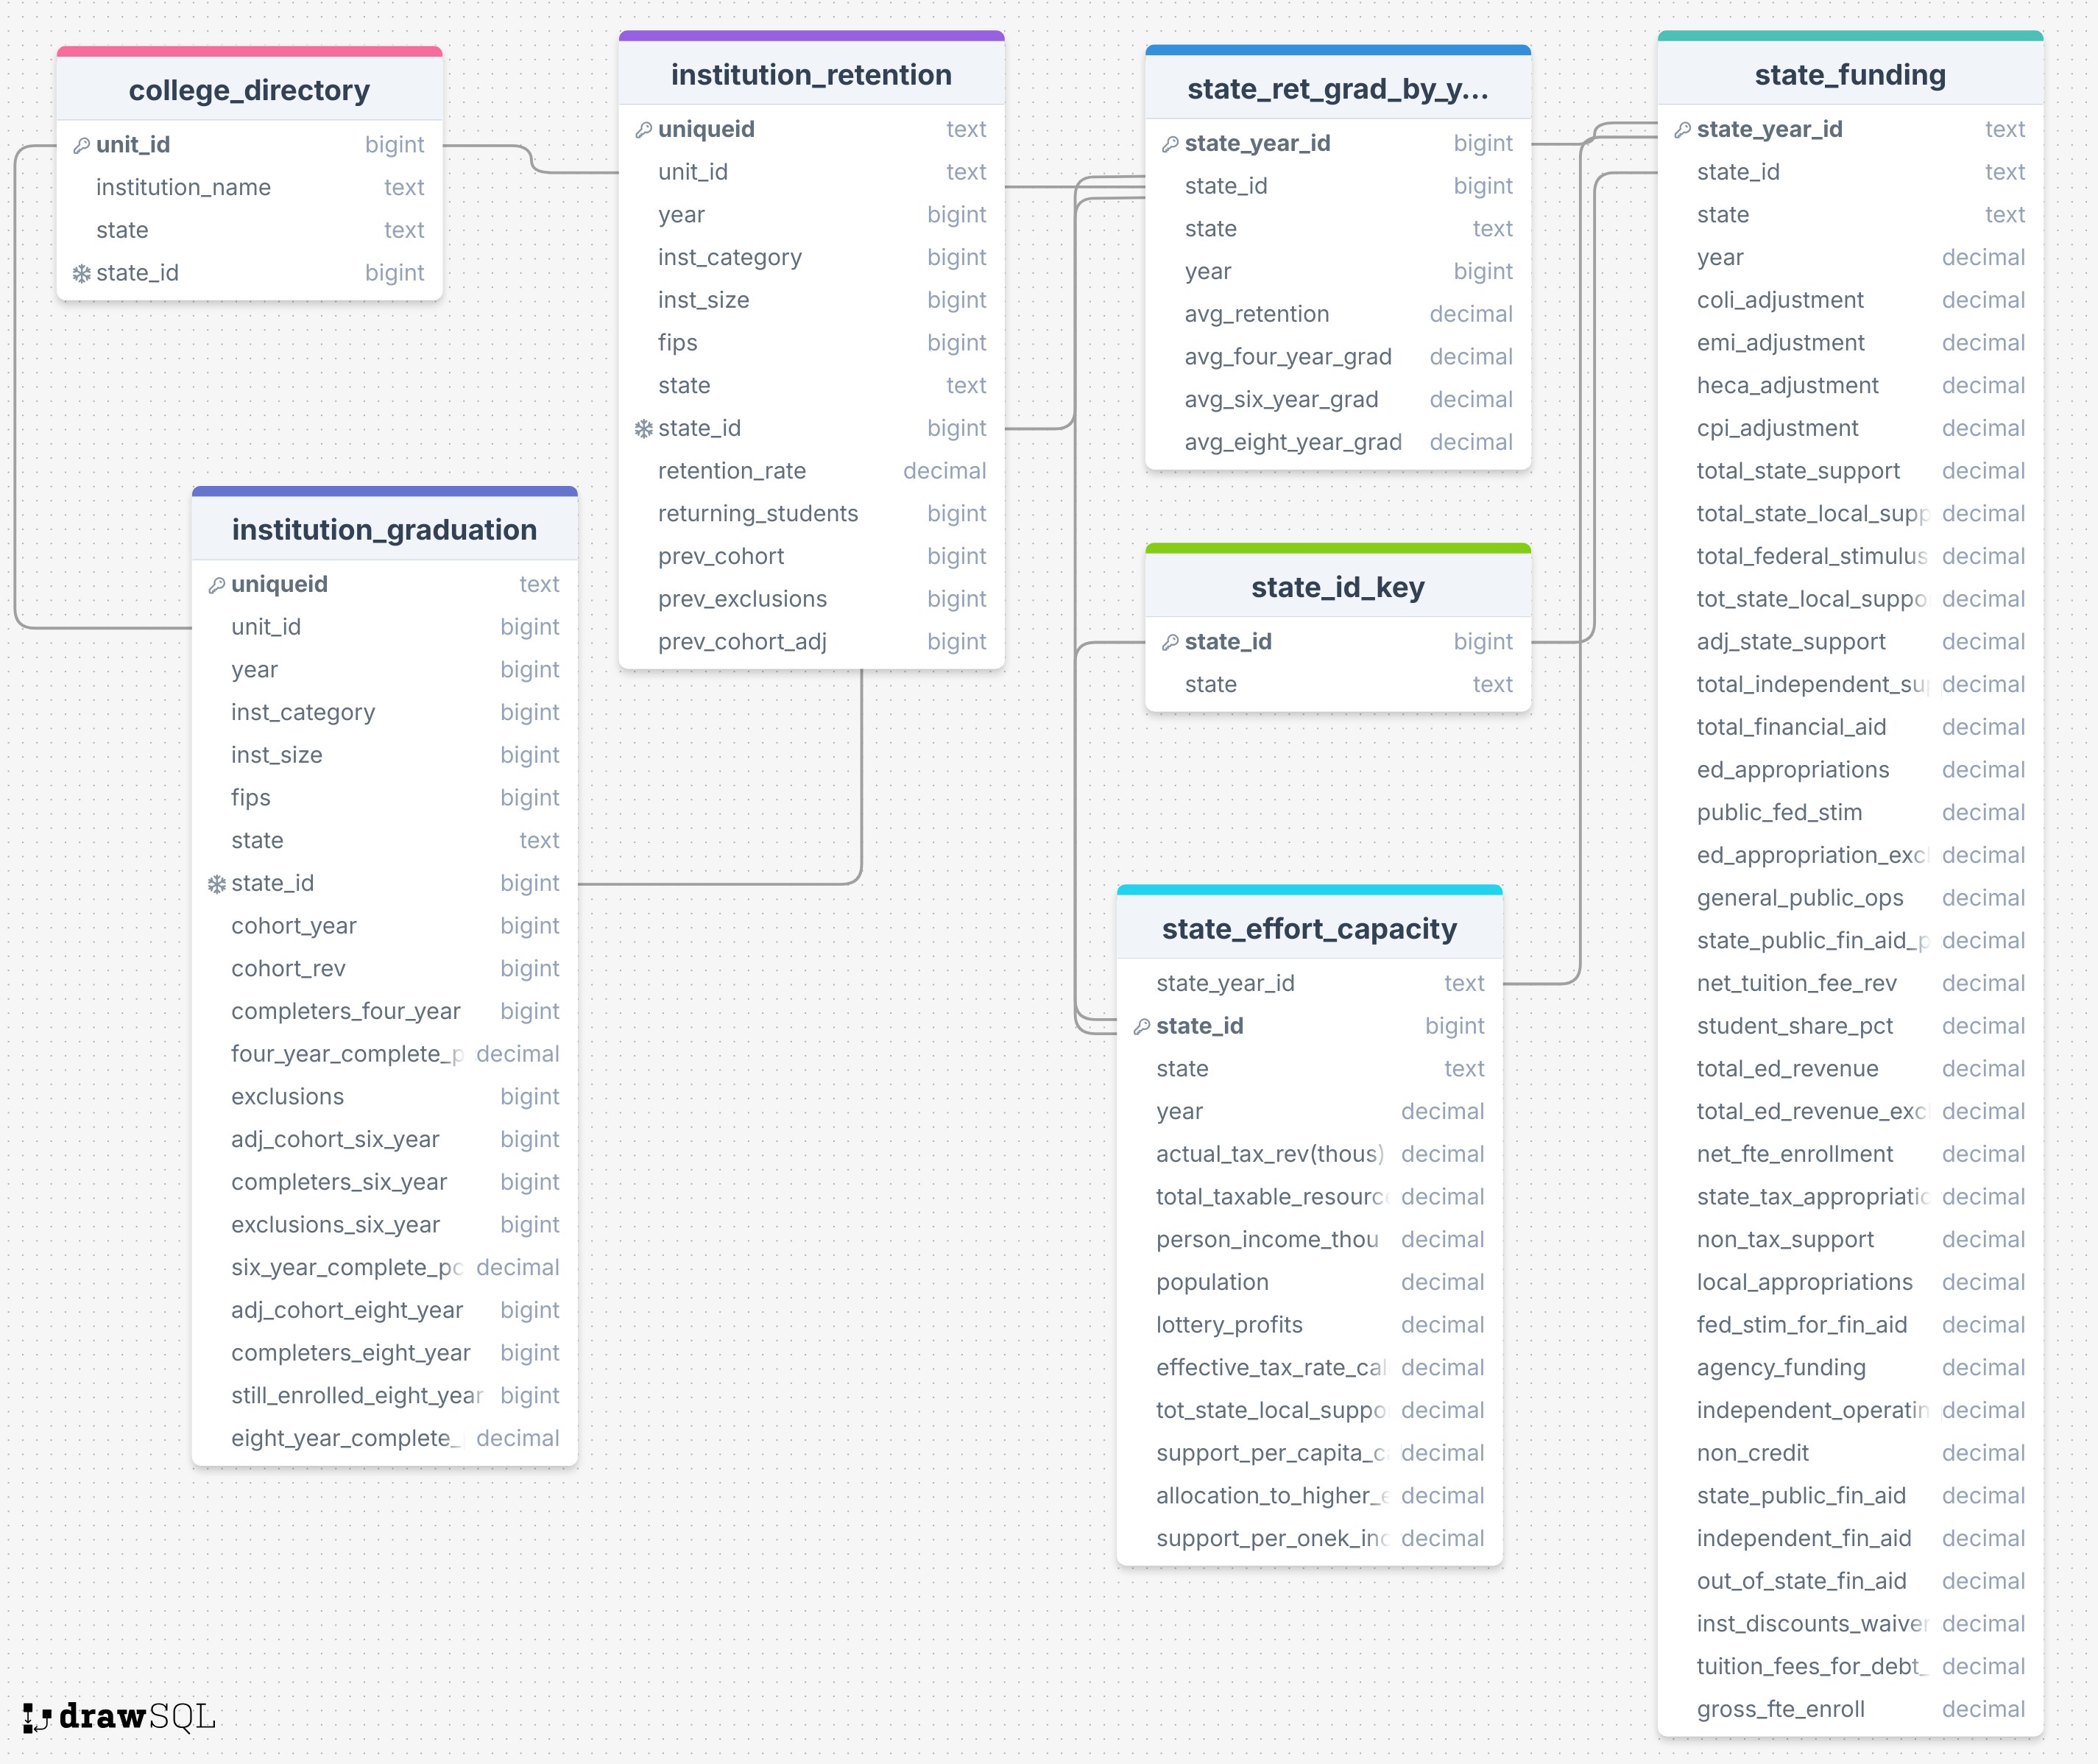

In [ ]:
get_table_names()

[('state_funding',),
 ('college_directory',),
 ('state_effort_capacity',),
 ('institution_retention',),
 ('institution_graduation',),
 ('state_id_key',),
 ('state_ret_grad_by_year',)]

In [ ]:
# going to define my tables and load them into AWS
# my_drop_table('college_directory')

cdp = """CREATE TABLE college_directory (
     unitid BIGINT PRIMARY KEY,
     institution_name TEXT NOT NULL,
     state TEXT NOT NULL,
     state_id BIGINT NOT NULL
     );"""

conn, cur = get_conn_cur()
cur.execute(cdp)
conn.commit()


DuplicateTable: relation "college_directory" already exists


In [ ]:
# my_drop_table('institution_retention')

irp = """CREATE TABLE institution_retention (
     uniqueid TEXT PRIMARY KEY,
     unitid BIGINT,
     year BIGINT,
     inst_category BIGINT,
     inst_size BIGINT,
     fips BIGINT,
     state TEXT,
     state_id BIGINT,
     retention_rate DECIMAL,
     returning_students BIGINT,
     prev_cohort BIGINT,
     prev_exclusions BIGINT,
     prev_cohort_adj BIGINT
     );"""

conn, cur = get_conn_cur()
cur.execute(irp)
conn.commit()

In [ ]:
# my_drop_table('institution_graduation')

igp = """CREATE TABLE institution_graduation (
     uniqueid TEXT PRIMARY KEY,
     unitid BIGINT,
     year BIGINT,
     inst_category BIGINT,
     inst_size BIGINT,
     fips BIGINT,
     state TEXT,
     state_id BIGINT,
     cohort_year BIGINT,
     cohort_rev BIGINT,
     completers_four_year BIGINT,
     four_year_complete_pct DECIMAL,
     exclusions BIGINT,
     adj_cohort_six_year BIGINT,
     completers_six_year BIGINT,
     exclusions_six_year BIGINT,
     six_year_complete_pct DECIMAL,
     adj_cohort_eight_year BIGINT,
     completers_eight_year BIGINT,
     still_enrolled_eight_year BIGINT,
     eight_year_complete_pct DECIMAL
     );"""

conn, cur = get_conn_cur()
cur.execute(igp)
conn.commit()

In [ ]:
# my_drop_table('state_ret_grad_by_year')

srgp = """CREATE TABLE state_ret_grad_by_year (
     state_year_id BIGINT PRIMARY KEY,
     state_id BIGINT,
     state TEXT,
     year BIGINT,
     avg_retention DECIMAL,
     avg_four_year_grad DECIMAL,
     avg_six_year_grad DECIMAL,
     avg_eight_year_grad DECIMAL
     );"""

conn, cur = get_conn_cur()
cur.execute(srgp)
conn.commit()

In [ ]:
# my_drop_table('state_id_key')

sidp = """CREATE TABLE state_id_key (
     state_id BIGINT PRIMARY KEY,
     state TEXT
     );"""

conn, cur = get_conn_cur()
cur.execute(sidp)
conn.commit()

DuplicateTable: relation "state_id_key" already exists


In [ ]:
# my_drop_table('state_funding')

sfp = """CREATE TABLE state_funding (
     state_year_id TEXT PRIMARY KEY,
     state_id TEXT,
     state TEXT,
     year DECIMAL,
     coli_adjustment DECIMAL,
     emi_adjustment DECIMAL,
     heca_adjustment DECIMAL,
     cpi_adjustment DECIMAL,
     total_state_support DECIMAL,
     total_state_local_support DECIMAL,
     total_federal_stimulus DECIMAL,
     tot_state_local_support_exclude_fed_stim DECIMAL,
     adj_state_support DECIMAL,
     total_independent_support DECIMAL,
     total_financial_aid DECIMAL,
     ed_appropriations DECIMAL,
     public_fed_stim DECIMAL,
     ed_appropriation_exclude_fed_stim DECIMAL,
     general_public_ops DECIMAL,
     state_public_fin_aid_pct_of_ed_approp DECIMAL,
     net_tuition_fee_rev DECIMAL,
     student_share_pct DECIMAL,
     total_ed_revenue DECIMAL,
     total_ed_revenue_exclude_fed_stim DECIMAL,
     net_fte_enrollment DECIMAL,
     state_tax_appropriations DECIMAL,
     non_tax_support DECIMAL,
     local_appropriations DECIMAL,
     fed_stim_for_fin_aid DECIMAL,
     agency_funding DECIMAL,
     independent_operating DECIMAL,
     non_credit DECIMAL,
     state_public_fin_aid DECIMAL,
     independent_fin_aid DECIMAL,
     out_of_state_fin_aid DECIMAL,
     inst_discounts_waivers DECIMAL,
     tuition_fees_for_debt_services DECIMAL,
     gross_fte_enroll DECIMAL
     );"""

conn, cur = get_conn_cur()
cur.execute(sfp)
conn.commit()

DuplicateTable: relation "state_funding" already exists


In [ ]:
# my_drop_table('state_effort_capacity')

secp = """CREATE TABLE state_effort_capacity (
     state_year_id TEXT PRIMARY KEY,
     state_id BIGINT,
     state TEXT,
     year DECIMAL,
     actual_tax_rev DECIMAL,
     total_taxable_resources DECIMAL,
     person_income_thou DECIMAL,
     population DECIMAL,
     lottery_profits DECIMAL,
     effective_tax_rate_calculated DECIMAL,
     tot_state_local_support_exclude_fed_stim_calc DECIMAL,
     support_per_capita_calc DECIMAL,
     allocation_to_higher_ed_calc DECIMAL,
     support_per_onek_income DECIMAL
     );"""

conn, cur = get_conn_cur()
cur.execute(secp)
conn.commit()

In [ ]:
#Lets make sure they are all there
get_table_names()

[('state_funding',),
 ('college_directory',),
 ('state_effort_capacity',),
 ('institution_retention',),
 ('institution_graduation',),
 ('state_id_key',),
 ('state_ret_grad_by_year',)]

In [ ]:
#Now we will load our data into our tables
#first for the college_directory, I will make a table just for that
college_directory = ipeds_final[['unitid', 'inst_name', 'state', 'state_id']]
#I need to drop the duplicates because the full_ipeds data is listed by institution/year, and for the directory we just need one instance per institution.

college_directory = college_directory.drop_duplicates(subset=['unitid'], keep='first')



In [ ]:
#then I will load this data into the college_directory table

directory_np = college_directory.to_numpy();
directory_tups = [tuple(x) for x in directory_np]


cdq = """INSERT INTO college_directory(unitid, institution_name, state, state_id)
                                                           VALUES(%s, %s, %s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(cdq, directory_tups)
conn.commit()
conn.close()

UniqueViolation: duplicate key value violates unique constraint "college_directory_pkey"
DETAIL:  Key (unitid)=(100654) already exists.


In [ ]:
sql_head('college_directory')

,unitid,institution_name,state,state_id
0,100654,Alabama A & M University,Alabama,0
1,100663,University of Alabama at Birmingham,Alabama,0
2,100690,Amridge University,Alabama,0
3,100706,University of Alabama in Huntsville,Alabama,0
4,100724,Alabama State University,Alabama,0


In [ ]:
#next I will make the institution retention table

inst_retention = ipeds_final[['uniqueid', 'unitid', 'year', 'inst_category', 'inst_size','fips', 'state', 'state_id',
        'retention_rate', 'returning_students',
       'prev_cohort', 'prev_exclusions', 'prev_cohort_adj']]

inst_retention = inst_retention.replace('nan', None)


inst_ret_np = inst_retention.to_numpy();
inst_ret_tups = [tuple(x) for x in inst_ret_np]


irq = """INSERT INTO institution_retention(uniqueid, unitid, year, inst_category, inst_size, fips, state, state_id,
                                        retention_rate, returning_students, prev_cohort, prev_exclusions, prev_cohort_adj)
                                                           VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(irq, inst_ret_tups)
conn.commit()
conn.close()

UniqueViolation: duplicate key value violates unique constraint "institution_retention_pkey"
DETAIL:  Key (uniqueid)=(10065420070) already exists.


In [ ]:
sql_head('institution_retention')

,uniqueid,unitid,year,inst_category,inst_size,fips,state,state_id,retention_rate,returning_students,prev_cohort,prev_exclusions,prev_cohort_adj
0,10065420070,100654,2007,2,3,1,Alabama,0,0.69,777,1133,0,1133
1,10065420080,100654,2008,2,3,1,Alabama,0,0.68,598,882,0,882
2,10065420090,100654,2009,2,3,1,Alabama,0,0.69,718,1044,0,1044
3,10065420100,100654,2010,2,3,1,Alabama,0,0.75,780,1046,0,1046
4,10065420110,100654,2011,2,3,1,Alabama,0,0.64,715,1110,0,1110


In [ ]:
#next I will make the institution graduation table

inst_graduation = ipeds_final[['uniqueid', 'unitid', 'year', 'inst_category', 'inst_size','fips', 'state', 'state_id',
        'cohort_year', 'cohort_rev', 'completers_100pct', 'completion_rate_100pct', 'exclusions', 'cohort_adj_150pct', 'completers_150pct','add_exclusions',
        'completion_rate_150pct', 'cohort_adj_200pct', 'completers_200pct', 'still_enrolled_200pct','completion_rate_200pct']]


inst_graduation = inst_graduation.replace('nan', None)


inst_grad_np = inst_graduation.to_numpy();
inst_grad_tups = [tuple(x) for x in inst_grad_np]


igq = """INSERT INTO institution_graduation(uniqueid, unitid, year, inst_category, inst_size, fips, state, state_id, cohort_year, cohort_rev,
                                            completers_four_year, four_year_complete_pct, exclusions, adj_cohort_six_year, completers_six_year,
                                            exclusions_six_year, six_year_complete_pct, adj_cohort_eight_year, completers_eight_year,
                                            still_enrolled_eight_year, eight_year_complete_pct)
                                                           VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(igq, inst_grad_tups)
conn.commit()
conn.close()

In [ ]:
sql_head('institution_graduation')

,uniqueid,unitid,year,inst_category,inst_size,fips,state,state_id,cohort_year,cohort_rev,...,four_year_complete_pct,exclusions,adj_cohort_six_year,completers_six_year,exclusions_six_year,six_year_complete_pct,adj_cohort_eight_year,completers_eight_year,still_enrolled_eight_year,eight_year_complete_pct
0,10065420070,100654,2007,2,3,1,Alabama,0,2000,1020,...,0.12,0,1020,342,0,0.34,1020,761,NaN,0.75
1,10065420080,100654,2008,2,3,1,Alabama,0,2001,1038,...,0.13,0,1038,345,0,0.33,1038,486,NaN,0.47
2,10065420090,100654,2009,2,3,1,Alabama,0,2002,1043,...,0.11,0,1043,339,0,0.33,1043,475,NaN,0.46
3,10065420100,100654,2010,2,3,1,Alabama,0,2003,1287,...,9,0,1287,370,0,0.29,1287,457,0.0,0.36
4,10065420110,100654,2011,2,3,1,Alabama,0,2004,1198,...,0.12,0,1198,396,0,0.33,1198,421,0.0,0.35


In [ ]:
#next I will make the state_ret_grad_by_year table
#I will need to make a key that combines state and year
#will need to groupby state and then aggregate the retention and graduation information and provide averages
#going to create a simple table first

state_ret_grad = ipeds_final[['state_id', 'state', 'year', 'retention_rate', 'completion_rate_100pct', 'completion_rate_150pct', 'completion_rate_200pct']]

state_ret_grad = state_ret_grad.astype({'state_id': 'string', 'state': 'string', 'year': 'int64', 'retention_rate': 'float64', 'completion_rate_100pct': 'float64',
                                        'completion_rate_150pct': 'float64', 'completion_rate_200pct': 'float64'})

state_ret_grad = state_ret_grad.replace('nan', None)



#next I will group by state_id and on year
state_ret_grad_grouped = state_ret_grad.groupby([state_ret_grad['state_id'], pd.Grouper(key = 'year')]).agg({'retention_rate': ['mean'], 'completion_rate_100pct': ['mean'],
                                                                                                              'completion_rate_150pct': ['mean'], 'completion_rate_200pct': ['mean']})

state_ret_grad_grouped = state_ret_grad_grouped.reset_index()

state_ret_grad_grouped['year'] = state_ret_grad_grouped['year'].astype('string')


#I am going to have to make a unique id for this group since there will be multiple listings per state.
state_ret_grad_grouped['state_year_id'] = ((state_ret_grad_grouped['state_id']).astype('string') + state_ret_grad_grouped['year']).astype('string')

#lets go ahead and move that to the first column
#have to rename the columns first
state_ret_grad_grouped.columns = [['state_id', 'year', 'avg_retention', 'avg_four_year_grad',
                                                 'avg_six_year_grad', 'avg_eight_year_grad', 'state_year_id']]

state_ret_grad_grouped = state_ret_grad_grouped[['state_year_id', 'state_id', 'year', 'avg_retention', 'avg_four_year_grad',
                                                 'avg_six_year_grad', 'avg_eight_year_grad']]

state_ret_grad_grouped = state_ret_grad_grouped.astype({'state_year_id': 'string', 'state_id': 'string', 'year': 'string', 'avg_retention': 'float64', 'avg_four_year_grad': 'float64',
                                                 'avg_six_year_grad': 'float64', 'avg_eight_year_grad': 'float64'})
#I am also going to round these to two decimal places for consistency
state_ret_grad_grouped[['avg_retention', 'avg_four_year_grad', 'avg_six_year_grad', 'avg_eight_year_grad']] = state_ret_grad_grouped[['avg_retention', 'avg_four_year_grad', 'avg_six_year_grad', 'avg_eight_year_grad']].round(2)


state_rg_np = state_ret_grad_grouped.to_numpy();
state_rg_tups = [tuple(x) for x in state_rg_np]


srgq = """INSERT INTO state_ret_grad_by_year(state_year_id, state_id, year,	avg_retention, avg_four_year_grad, avg_six_year_grad, avg_eight_year_grad)
                                                           VALUES(%s, %s, %s, %s, %s, %s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(srgq, state_rg_tups)
conn.commit()
conn.close()

In [ ]:
sql_head('state_ret_grad_by_year')

,state_year_id,state_id,state,year,avg_retention,avg_four_year_grad,avg_six_year_grad,avg_eight_year_grad
0,-12007,-1,None,2007,0.67,0.87,0.72,0.69
1,-12008,-1,None,2008,0.66,0.9,0.76,0.76
2,-12009,-1,None,2009,0.66,0.97,0.75,0.7
3,-12010,-1,None,2010,0.66,0.92,0.74,0.7
4,-12011,-1,None,2011,0.66,0.95,0.7,0.69


In [ ]:
#I will also make a very simple state_id table because for some reason I can't get my grouping by state_id to include the state name
#this will make it easier to query and also provide a guide

state_id_df = pd.DataFrame(ipeds_final[['state_id', 'state']])
# state_id['id_string'] = (state_id['state_id'].astype('string'))
state_id_df = state_id_df.reset_index()
state_id_df = state_id_df[['state_id', 'state']]
state_id_df = state_id_df.astype('string')

state_id_df = state_id_df.drop_duplicates(subset=['state_id'], keep='last')
state_id_df = state_id_df.sort_values(by=['state'])


state_id_np = state_id_df.to_numpy();
state_id_tups = [tuple(x) for x in state_id_np]


siq = """INSERT INTO state_id_key(state_id, state)
                              VALUES(%s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(siq, state_id_tups)
conn.commit()
conn.close()

In [ ]:
sql_head('state_id_key')

,state_id,state
0,0,Alabama
1,1,Alaska
2,2,Arizona
3,3,Arkansas
4,4,California


In [ ]:
#sheeo state funding table creation
state_funding = sheeo_final[['state_id', 'state', 'fy', 'coli_adjustment', 'emi_adjustment', 'heca_adjustment', 'cpi_adjustment','total_state_support',
                            'total_state_local_support', 'total_federal_stimulus', 'tot_state_local_support_exclude_fed_stim', 'adj_state_support',
                            'total_independent_support', 'total_financial_aid', 'ed_appropriations', 'public_fed_stim', 'ed_appropriation_exclude_fed_stim',
                            'general_public_ops', 'state_public_fin_aid_pct_of_ed_approp', 'net_tuition_fee_rev', 'student_share_pct', 'total_ed_revenue',
                            'total_ed_revenue_exclude_fed_stim', 'net_fte_enrollment', 'state_tax_appropriations', 'non_tax_support', 'local_appropriations',
                            'fed_stim_for_fin_aid', 'agency_funding', 'independent_operating', 'non_credit', 'state_public_fin_aid', 'independent_fin_aid',
                            'out_of_state_fin_aid', 'inst_discounts_waivers', 'tuition_fees_for_debt_services', 'gross_fte_enroll']]

state_funding.columns = ['state_id', 'state', 'fy', 'coli_adjustment', 'emi_adjustment', 'heca_adjustment', 'cpi_adjustment','total_state_support',
                            'total_state_local_support', 'total_federal_stimulus', 'tot_state_local_support_exclude_fed_stim', 'adj_state_support',
                            'total_independent_support', 'total_financial_aid', 'ed_appropriations', 'public_fed_stim', 'ed_appropriation_exclude_fed_stim',
                            'general_public_ops', 'state_public_fin_aid_pct_of_ed_approp', 'net_tuition_fee_rev', 'student_share_pct', 'total_ed_revenue',
                            'total_ed_revenue_exclude_fed_stim', 'net_fte_enrollment', 'state_tax_appropriations', 'non_tax_support', 'local_appropriations',
                            'fed_stim_for_fin_aid', 'agency_funding', 'independent_operating', 'non_credit', 'state_public_fin_aid', 'independent_fin_aid',
                            'out_of_state_fin_aid', 'inst_discounts_waivers', 'tuition_fees_for_debt_services', 'gross_fte_enroll']

state_funding = state_funding.replace('-', 'nan')
state_funding = state_funding.replace('nan', None)

state_funding = state_funding.reset_index()


#I also need to create a unique key
state_funding['state_year_id'] = (state_funding['state_id']).astype('string') + state_funding['fy'].astype('string')

#just need to re-order here
state_funding = state_funding[['state_year_id', 'state_id', 'state', 'fy', 'coli_adjustment', 'emi_adjustment', 'heca_adjustment', 'cpi_adjustment','total_state_support',
                            'total_state_local_support', 'total_federal_stimulus', 'tot_state_local_support_exclude_fed_stim', 'adj_state_support',
                            'total_independent_support', 'total_financial_aid', 'ed_appropriations', 'public_fed_stim', 'ed_appropriation_exclude_fed_stim',
                            'general_public_ops', 'state_public_fin_aid_pct_of_ed_approp', 'net_tuition_fee_rev', 'student_share_pct', 'total_ed_revenue',
                            'total_ed_revenue_exclude_fed_stim', 'net_fte_enrollment', 'state_tax_appropriations', 'non_tax_support', 'local_appropriations',
                            'fed_stim_for_fin_aid', 'agency_funding', 'independent_operating', 'non_credit', 'state_public_fin_aid', 'independent_fin_aid',
                            'out_of_state_fin_aid', 'inst_discounts_waivers', 'tuition_fees_for_debt_services', 'gross_fte_enroll']]

state_funding_np = state_funding.to_numpy();
state_funding_tup = [tuple(x) for x in state_funding_np]

sfq = """INSERT INTO state_funding(state_year_id, state_id, state, year, coli_adjustment, emi_adjustment, heca_adjustment, cpi_adjustment, total_state_support,
                            total_state_local_support, total_federal_stimulus, tot_state_local_support_exclude_fed_stim, adj_state_support,
                            total_independent_support, total_financial_aid, ed_appropriations, public_fed_stim, ed_appropriation_exclude_fed_stim,
                            general_public_ops, state_public_fin_aid_pct_of_ed_approp, net_tuition_fee_rev, student_share_pct, total_ed_revenue,
                            total_ed_revenue_exclude_fed_stim, net_fte_enrollment, state_tax_appropriations, non_tax_support, local_appropriations,
                            fed_stim_for_fin_aid, agency_funding, independent_operating, non_credit, state_public_fin_aid, independent_fin_aid,
                            out_of_state_fin_aid, inst_discounts_waivers, tuition_fees_for_debt_services, gross_fte_enroll)
                                                           VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s,
                                                                  %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(sfq, state_funding_tup)
conn.commit()
conn.close()



In [ ]:
sql_head('state_funding')

,state_year_id,state_id,state,year,coli_adjustment,emi_adjustment,heca_adjustment,cpi_adjustment,total_state_support,total_state_local_support,...,fed_stim_for_fin_aid,agency_funding,independent_operating,non_credit,state_public_fin_aid,independent_fin_aid,out_of_state_fin_aid,inst_discounts_waivers,tuition_fees_for_debt_services,gross_fte_enroll
0,02007,0,Alabama,2007,0.874817,1.020407,0.687403,0.680237,1685067489,1687710132,...,NaN,NaN,11380763,16428598,35216048,3152933,99425,NaN,61307250,188563
1,02008,0,Alabama,2008,0.874817,1.020407,0.707556,0.709072,1961808342,1964218104,...,NaN,NaN,15131285,18769338,33208390,4837102,79161,NaN,78069227,193451
2,02009,0,Alabama,2009,0.874817,1.020407,0.718584,0.704806,1581208946,1583677277,...,NaN,NaN,11850165,13420516,33347651,3481593,115862,NaN,88061260,206041
3,02010,0,Alabama,2010,0.874817,1.020407,0.729501,0.719343,1542585887,1544765998,...,NaN,NaN,10693862,12193805,37624240,2857250,69120,NaN,94133655,217329
4,02011,0,Alabama,2011,0.874817,1.020407,0.744922,0.739392,1543660595,1545862020,...,NaN,NaN,10602284,12656223,44489857,2856880,34354,NaN,101961717,220125


In [ ]:
#sheeo state effort table creation
state_effort = sheeo_final[['state_id', 'state', 'fy', 'actual_tax_rev', 'total_taxable_resources', 'person_income_thou', 'population',
                             'lottery_profits', 'effective_tax_rate_calculated', 'tot_state_local_support_exclude_fed_stim_calc ',
                             'support_per_capita_calc', 'allocation_to_higher_ed_calc', 'support_per_onek_income']]

state_effort = state_effort.astype('string')
state_effort = state_effort.replace('  -   ', '0').astype('string')
state_effort = state_effort.replace('nan', None)

state_effort.columns = ['state_id', 'state', 'fy', 'actual_tax_rev', 'total_taxable_resources', 'person_income_thou', 'population',
                             'lottery_profits', 'effective_tax_rate_calculated', 'tot_state_local_support_exclude_fed_stim_calc ',
                             'support_per_capita_calc', 'allocation_to_higher_ed_calc', 'support_per_onek_income']

#I also need to create a unique key
state_effort['state_year_id'] = (state_effort['state_id']).astype('string') + state_effort['fy'].astype('string')
#also going to re-order
state_effort = state_effort[['state_year_id', 'state_id', 'state', 'fy', 'actual_tax_rev', 'total_taxable_resources', 'person_income_thou', 'population',
                             'lottery_profits', 'effective_tax_rate_calculated', 'tot_state_local_support_exclude_fed_stim_calc ',
                             'support_per_capita_calc', 'allocation_to_higher_ed_calc', 'support_per_onek_income']]


state_effort_np = state_effort.to_numpy();
state_effort_tups = [tuple(x) for x in state_effort_np]



state_effort.head()
seq = """INSERT INTO state_effort_capacity(state_year_id, state_id, state, year, actual_tax_rev, total_taxable_resources, person_income_thou, population,
                                  lottery_profits, effective_tax_rate_calculated, tot_state_local_support_exclude_fed_stim_calc,
                                  support_per_capita_calc, allocation_to_higher_ed_calc, support_per_onek_income)
                                                           VALUES(%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s);"""

conn, cur = get_conn_cur()
cur.executemany(seq, state_effort_tups)
conn.commit()
conn.close()


In [ ]:
sql_head('state_effort_capacity')

,state_year_id,state_id,state,year,actual_tax_rev,total_taxable_resources,person_income_thou,population,lottery_profits,effective_tax_rate_calculated,tot_state_local_support_exclude_fed_stim_calc,support_per_capita_calc,allocation_to_higher_ed_calc,support_per_onek_income
0,02007,0,Alabama,2007,13529680000,193400000000,144474906250,4628981,0,7.0,1687710132,365,12.5,11.68
1,02008,0,Alabama,2008,14040760000,193000000000,151617000000,4672840,0,7.3,1964218104,420,14.0,12.96
2,02009,0,Alabama,2009,13349220000,184300000000,162237296875,4718206,0,7.2,1583677277,336,11.9,9.76
3,02010,0,Alabama,2010,13284900000,193100000000,156433796875,4757938,0,6.9,1426022453,300,10.7,9.12
4,02011,0,Alabama,2011,13878570000,201800000000,161353296875,4785437,0,6.9,1427118475,298,10.3,8.84


### Queries!

Lets do a couple queries

In [ ]:
q1 = """ SELECT avg_retention, state_id FROM state_ret_grad_by_year
          WHERE state_id IN (SELECT state_id FROM state_effort_capacity
                                GROUP BY state_id
                                HAVING MAX(support_per_capita_calc) > AVG(support_per_capita_calc)) """

run_query(q1)

(['avg_retention', 'state_id'],
 [(Decimal('0.63'), 0),
  (Decimal('0.62'), 0),
  (Decimal('0.65'), 0),
  (Decimal('0.62'), 0),
  (Decimal('0.63'), 0),
  (Decimal('0.6'), 0),
  (Decimal('0.61'), 0),
  (Decimal('0.61'), 0),
  (Decimal('0.62'), 0),
  (Decimal('0.73'), 0),
  (Decimal('0.63'), 0),
  (Decimal('0.68'), 1),
  (Decimal('0.66'), 1),
  (Decimal('0.73'), 1),
  (Decimal('0.62'), 1),
  (Decimal('0.68'), 1),
  (Decimal('0.56'), 1),
  (Decimal('0.66'), 1),
  (Decimal('0.71'), 1),
  (Decimal('0.68'), 1),
  (Decimal('0.61'), 1),
  (Decimal('0.73'), 1),
  (Decimal('0.64'), 10),
  (Decimal('0.65'), 10),
  (Decimal('0.66'), 10),
  (Decimal('0.65'), 10),
  (Decimal('0.65'), 10),
  (Decimal('0.64'), 10),
  (Decimal('0.66'), 10),
  (Decimal('0.65'), 10),
  (Decimal('0.67'), 10),
  (Decimal('0.66'), 10),
  (Decimal('0.65'), 10),
  (Decimal('0.63'), 11),
  (Decimal('0.64'), 11),
  (Decimal('0.66'), 11),
  (Decimal('0.62'), 11),
  (Decimal('0.65'), 11),
  (Decimal('0.68'), 11),
  (Decimal('0.7'

In [ ]:
q2 = """ SELECT student_share_pct, state FROM state_funding
          WHERE state IN (SELECT state FROM institution_graduation
                                GROUP BY state
                                HAVING AVG(four_year_complete_pct) >= .80) """

run_query(q2)

(['student_share_pct', 'state'],
 [(Decimal('46.00'), 'Alabama'),
  (Decimal('42.70'), 'Alabama'),
  (Decimal('51.80'), 'Alabama'),
  (Decimal('57.60'), 'Alabama'),
  (Decimal('60.40'), 'Alabama'),
  (Decimal('64.40'), 'Alabama'),
  (Decimal('67.40'), 'Alabama'),
  (Decimal('68.00'), 'Alabama'),
  (Decimal('69.20'), 'Alabama'),
  (Decimal('70.80'), 'Alabama'),
  (Decimal('70.10'), 'Alabama'),
  (Decimal('21.50'), 'Alaska'),
  (Decimal('22.00'), 'Alaska'),
  (Decimal('21.70'), 'Alaska'),
  (Decimal('22.70'), 'Alaska'),
  (Decimal('23.50'), 'Alaska'),
  (Decimal('23.40'), 'Alaska'),
  (Decimal('22.70'), 'Alaska'),
  (Decimal('20.90'), 'Alaska'),
  (Decimal('20.60'), 'Alaska'),
  (Decimal('22.90'), 'Alaska'),
  (Decimal('23.50'), 'Alaska'),
  (Decimal('36.80'), 'Arizona'),
  (Decimal('36.20'), 'Arizona'),
  (Decimal('38.10'), 'Arizona'),
  (Decimal('42.90'), 'Arizona'),
  (Decimal('46.50'), 'Arizona'),
  (Decimal('53.90'), 'Arizona'),
  (Decimal('55.00'), 'Arizona'),
  (Decimal('56.10'), 

In [ ]:
q3 = """ SELECT institution_name, state FROM college_directory
          WHERE state_id IN (SELECT state_id FROM state_ret_grad_by_year
                                GROUP BY state_id
                                HAVING MAX(avg_retention) > AVG(avg_retention)) """

run_query(q3)

(['institution_name', 'state'],
 [('Alabama A & M University', 'Alabama'),
  ('University of Alabama at Birmingham', 'Alabama'),
  ('Amridge University', 'Alabama'),
  ('University of Alabama in Huntsville', 'Alabama'),
  ('Alabama State University', 'Alabama'),
  ('The University of Alabama', 'Alabama'),
  ('Central Alabama Community College', 'Alabama'),
  ('Athens State University', 'Alabama'),
  ('Auburn University at Montgomery', 'Alabama'),
  ('Auburn University', 'Alabama'),
  ('Birmingham-Southern College', 'Alabama'),
  ('Chattahoochee Valley Community College', 'Alabama'),
  ('Concordia College Alabama', 'Alabama'),
  ('South University-Montgomery', 'Alabama'),
  ('Enterprise State Community College', 'Alabama'),
  ('Coastal Alabama Community College', 'Alabama'),
  ('Faulkner University', 'Alabama'),
  ('Gadsden State Community College', 'Alabama'),
  ('New Beginning College of Cosmetology', 'Alabama'),
  ('George C Wallace Community College-Dothan', 'Alabama'),
  ('George C